In [1]:
#To supress Future Warning of Pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
#Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15.0
plt.rcParams['figure.figsize'] = [15, 7] 
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

/var/folders/dv/_t8zxwtd0tq5k52mjcg978n00000gn/T/ipykernel_1277/3180332355.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


# Data Assessment

## Summary

The dataset contains financial and credit-related information such as salary, bank accounts, credit utilization, debt, and payment behavior, aimed at classifying individuals into credit score brackets.

## Column Descriptions

- **ID**: Unique identifier for each record.
- **Customer_ID**: Unique identifier for each customer.
- **Month**: The month during which the data was recorded.
- **Name**: The name of the customer.
- **Age**: The age of the customer.
- **Number**: A numeric identifier related to the customer.
- **Profession**: The profession of the customer.
- **Income_Annual**: The customer's annual income.
- **Base_Salary_PerMonth**: The customer's base monthly salary.
- **Total_Bank_Accounts**: The total number of bank accounts the customer holds.
- **Total_Credit_Cards**: The total number of credit cards the customer owns.
- **Rate_Of_Interest**: The interest rate associated with the customer's credit.
- **Delay_from_due_date**: The number of days the customer delays payments beyond the due date.
- **Total_Credit_Enquiries**: The total number of credit inquiries made for the customer.
- **Ratio_Credit_Utilization**: The percentage of available credit the customer is using.
- **Per_Month_EMI**: The monthly equated installment (EMI) paid by the customer.
- **Credit_Mix**: The mix of different types of credit the customer holds.
- **Current_Debt_Outstanding**: The total amount of debt the customer currently owes.
- **Credit_History_Age**: The total duration of the customer's credit history.
- **Payment_of_Min_Amount**: Indicates if the customer pays only the minimum amount due.
- **Monthly_Investment**: The amount invested monthly by the customer.
- **Payment_Behaviour**: Describes the customer's payment behavior (e.g., low or high spending).
- **Monthly_Balance**: The customer's remaining balance at the end of each month.
- **Credit_Score**: The classification of the customer's credit score (target variable).


## Issues with Dataset

1. Dirty Data
   - ID, Customer_ID, Month, Name, Number, Credit_History_Age are useless for prediction
   - There are 12500 unique customers in data, with each customer having multiple entries
   - Base_Salary_PerMonth has missing values per Customer_ID, which can be filled by taking average
   - Age has non numeric, negative and extremely large values✅
   - Some values in Profession column are _______✅
   - Base salary has missing values✅
   - Income_Annual has non-numeric values✅
   - Total_Bank_Accounts have negative values✅
   - Rate_Of_Interest has extremely large value/s✅
   - Total_Current_Loans should be dropped in favour of Loan_Type✅
   - Total_Delayed_Payments has non numeric values✅ and some extremely large values✅
   - Credit_Limit has non numeric values✅
   - Credit_Mix has null values in the form of _ ✅
   - Current_Debt_Outstanding has non numeric values✅
   - Credit_History_Age has missing values and also needs to be changed to a better format
   - Monthly_Investment has non numeric values✅
   - Payment_Behaviour has dirty values✅
   - Monthly_Balance has dirty values✅
2. Messy Data
   - Loan_Type has comma separated values which should each have a distinct column✅
   - Payment_Behaviour should be OHE✅
   - Profession should be OHE✅

In [3]:
train

,ID,Customer_ID,Month,Name,Age,Number,Profession,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,...,Credit_Mix,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Payment_of_Min_Amount,Per_Month_EMI,Monthly_Investment,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x522a,CUS_0x2dbf,May,Abhishek Vishnoiw,51,370-51-2390,Musician,101583.48,NaN,5,...,Standard,50.93,34.462154,24 Years and 1 Months,No,190.811017,630.0157894388726,Low_spent_Large_value_payments,314.0021934422197,Standard
1,0x6091,CUS_0x8167,August,Freifeldu,23,721-85-0529,Writer,101926.95,8635.912500,4,...,_,1058,39.693812,20 Years and 5 Months,No,70.587681,662.8039273360225,Low_spent_Medium_value_payments,410.1996419555151,Standard
2,0xcb5f,CUS_0x3a0b,February,NaN,49,618-96-2558,Writer,158871.12,NaN,0,...,Good,576.48,39.367225,19 Years and 0 Months,No,86.905860,746.8059854204569,Low_spent_Medium_value_payments,742.5141542054829,Standard
3,0x17dbc,CUS_0x9a4b,March,Alex Dobuzinskiso,40,817-31-4270,Doctor,60379.28,NaN,5,...,Standard,725.39,29.061701,17 Years and 1 Months,NM,90.906385,166.41865803064803,High_spent_Medium_value_payments,473.13562343490486,Standard
4,0x225b3,CUS_0x253a,June,NaN,17,580-53-4920,Accountant,50050.83,4085.902500,9,...,Bad,3419.1,30.386321,4 Years and 6 Months,Yes,190.445060,56.789441169542684,High_spent_Large_value_payments,401.3557486786916,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0x15619,CUS_0x21f4,August,Flynnq,55,587-32-3592,Doctor,114597.04,NaN,7,...,Good,926.18,26.436313,31 Years and 9 Months,No,225.923762,327.61966834569836,High_spent_Medium_value_payments,633.131903,Poor
79996,0x3c48,CUS_0x68a8,July,laise Robinsono,28,517-09-6321,Entrepreneur,8227.855_,656.654583,6,...,_,2695.38,24.127401,11 Years and 8 Months,NM,7352.000000,49.54415830254037,Low_spent_Medium_value_payments,268.108435,Poor
79997,0x9589,CUS_0xc52a,August,da Costab,46,601-99-6960,Writer,35032.66,2853.388333,10,...,Bad,1789,25.086176,11 Years and 5 Months,Yes,150.500097,106.73567925309915,Low_spent_Small_value_payments,318.103057,Poor
79998,0x74fe,CUS_0xa955,May,Gabriel Wildauf,42,861-50-3592,Mechanic,129680.28,10643.690000,8,...,_,240.27,33.944094,20 Years and 5 Months,NM,114.165609,567.1798727916067,High_spent_Small_value_payments,643.023518,Standard


In [4]:
test

,ID,Customer_ID,Month,Name,Age,Number,Profession,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,...,Total_Credit_Enquiries,Credit_Mix,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Payment_of_Min_Amount,Per_Month_EMI,Monthly_Investment,Payment_Behaviour,Monthly_Balance
0,0x2145,CUS_0x7b3c,April,ray,40,397-72-8040,Mechanic,44386.47,NaN,10,...,12.0,Bad,1275.46,25.537989,9 Years and 2 Months,Yes,298.848530,50.620286846881505,High_spent_Medium_value_payments,270.91843286834296
1,0x7d59,CUS_0x1207,August,Wheatleym,34,365-76-1037,Developer,19506.73,1491.560833,9,...,15.0,Bad,1594.83,24.274661,14 Years and 10 Months,Yes,59.134042,149.6877642996111,Low_spent_Small_value_payments,230.33427734800028
2,0xe753,CUS_0x6e5d,June,Emily Stephensonn,39,238-58-8923,Entrepreneur,39962.38_,3151.198333,6,...,9.0,_,1444.91,38.856838,NaN,Yes,52463.000000,147.4037272255701,Low_spent_Medium_value_payments,357.9543299279187
3,0x19813,CUS_0x6ccd,February,Saphirl,28,689-97-8754,Mechanic,7477.175,713.097917,9,...,7.0,_,4944.58,36.125353,7 Years and 4 Months,NM,35.180443,NaN,Low_spent_Small_value_payments,288.7627183009845
4,0x1dc5e,CUS_0x85d,January,Forgionev,44,722-14-8267,Architect,41771.02,3293.918333,6,...,11.0,Bad,3524.73,24.735922,8 Years and 2 Months,Yes,127.617609,109.44246439877956,High_spent_Medium_value_payments,342.33176007179395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0x74ee,CUS_0x41cd,January,Ronald Groverz,34,342-11-7845,Scientist,76338.68,6608.556667,4,...,6.0,_,965.06,29.246919,13 Years and 3 Months,Yes,52.630065,370.40451925375214,Low_spent_Medium_value_payments,517.8210825
19996,0xd036,CUS_0x4a65,May,Olgas,38,399-59-9340,Architect,32009.81,2555.484167,5,...,7.0,_,310.76,34.525378,19 Years and 3 Months,Yes,18.340755,160.25882707307983,Low_spent_Large_value_payments,346.9488345
19997,0xba16,CUS_0x7b94,May,Rochay,18,449-05-9106,Media_Manager,107427.99,8868.332500,8,...,4.0,_,1124.02,28.410979,31 Years and 11 Months,No,55.659101,356.2755674389546,High_spent_Small_value_payments,734.8985815955858
19998,0xce25,CUS_0xfaf,April,Sveap,27,153-48-5124,Architect,39255.54,3546.295000,4,...,5.0,Good,536.03,35.147519,33 Years and 4 Months,No,46.034586,330.91391360112925,Low_spent_Small_value_payments,267.68100033914925


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      71971 non-null  object 
 4   Age                       80000 non-null  object 
 5   Number                    80000 non-null  object 
 6   Profession                80000 non-null  object 
 7   Income_Annual             80000 non-null  object 
 8   Base_Salary_PerMonth      67968 non-null  float64
 9   Total_Bank_Accounts       80000 non-null  int64  
 10  Total_Credit_Cards        80000 non-null  int64  
 11  Rate_Of_Interest          80000 non-null  int64  
 12  Total_Current_Loans       80000 non-null  object 
 13  Loan_Type                 70843 non-null  object 
 14  Delay_

In [6]:
train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         8029
Age                             0
Number                          0
Profession                      0
Income_Annual                   0
Base_Salary_PerMonth        12032
Total_Bank_Accounts             0
Total_Credit_Cards              0
Rate_Of_Interest                0
Total_Current_Loans             0
Loan_Type                    9157
Delay_from_due_date             0
Total_Delayed_Payments       5595
Credit_Limit                    0
Total_Credit_Enquiries       1549
Credit_Mix                      0
Current_Debt_Outstanding        0
Ratio_Credit_Utilization        0
Credit_History_Age           7240
Payment_of_Min_Amount           0
Per_Month_EMI                   0
Monthly_Investment           3605
Payment_Behaviour               0
Monthly_Balance               950
Credit_Score                    0
dtype: int64

In [7]:
unique_customers = train[train.duplicated(subset='Customer_ID')]['Customer_ID'].unique()

In [8]:
unique_customers.shape

(12500,)

In [9]:
len(train["Age"]) - train['Age'].str.isnumeric().sum()

np.int64(4676)

In [10]:
train['Total_Bank_Accounts'].describe()

count    80000.000000
mean        17.046287
std        116.953761
min         -1.000000
25%          4.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Total_Bank_Accounts, dtype: float64

In [11]:
train[train['Age'].str.isnumeric()]['Age'].astype(int).describe()

count    75324.000000
mean       117.030893
std        692.981343
min         14.000000
25%         25.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

In [12]:
train['Base_Salary_PerMonth'].describe()

count    67968.000000
mean      4189.211406
std       3181.371100
min        303.645417
25%       1623.664167
50%       3086.683333
75%       5950.863333
max      15204.633333
Name: Base_Salary_PerMonth, dtype: float64

In [13]:
train['Total_Credit_Cards'].describe()

count    80000.000000
mean        22.175438
std        128.083595
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: Total_Credit_Cards, dtype: float64

In [14]:
train['Rate_Of_Interest'].describe()

count    80000.000000
mean        72.261350
std        466.370837
min          1.000000
25%          8.000000
50%         14.000000
75%         20.000000
max       5797.000000
Name: Rate_Of_Interest, dtype: float64

In [15]:
train['Delay_from_due_date'].describe()

count    80000.000000
mean        21.081663
std         14.855210
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

In [16]:
train['Delay_from_due_date'][train['Delay_from_due_date']<0]

12      -2
464     -2
482     -5
623     -3
1262    -1
        ..
78740   -5
78816   -1
79019   -2
79587   -4
79791   -3
Name: Delay_from_due_date, Length: 475, dtype: int64

In [17]:
train['Total_Credit_Enquiries'].describe()

count    78451.000000
mean        28.153115
std        194.812201
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Total_Credit_Enquiries, dtype: float64

In [18]:
train['Credit_Mix'].unique()

array(['Standard', '_', 'Good', 'Bad'], dtype=object)

In [19]:
train['Ratio_Credit_Utilization'].describe()

count    80000.000000
mean        32.273436
std          5.116887
min         20.000000
25%         28.052046
50%         32.292625
75%         36.482439
max         49.564519
Name: Ratio_Credit_Utilization, dtype: float64

In [20]:
train['Per_Month_EMI'].describe()

count    80000.000000
mean      1414.789973
std       8323.122028
min          0.000000
25%         30.305498
50%         68.839655
75%        160.585877
max      82331.000000
Name: Per_Month_EMI, dtype: float64

In [21]:
train['Monthly_Investment'].describe()

count         76395
unique        72778
top       __10000__
freq           3479
Name: Monthly_Investment, dtype: object

In [22]:
train['Payment_Behaviour'].unique()

array(['Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Small_value_payments', '!@9#%8'], dtype=object)

In [23]:
train['Monthly_Balance'].describe()

count                                79050
unique                               79044
top       __-333333333333333333333333333__
freq                                     7
Name: Monthly_Balance, dtype: object

In [24]:
train['Credit_Score'].unique()

array(['Standard', 'Poor', 'Good'], dtype=object)

# Data Cleaning Part 1

In [25]:
#Creating backup of train dataframe
import copy
df = train.copy(deep=True)

In [26]:
#Dropping unnecessary columns
def drop_cols(df):
    df = df.drop(columns=['ID', 'Month', 'Name', 'Number'])
    return df

In [27]:
#OHE the Loan_Types
#Drop the Loan_Types column
#Drop the Total_Current_Loans
def ohe_loan_types(df):
    df['Loan_Type'] = df['Loan_Type'].astype(str)
    unique_loan_types = df['Loan_Type'].str.split(',').explode().str.replace('and','').str.strip().unique()
    for loan_type in unique_loan_types:
        # Replacing '-' and spaces with underscores, converting other characters to lowercase
        cleaned_loan_type = loan_type.replace(' ', '_').replace('-', '_').lower()
    
        # Counting how many times the loan_type value appears in each row
        df[cleaned_loan_type] = df['Loan_Type'].apply(lambda x: x.count(loan_type))
    df = df.rename(columns={'nan':'loan_not_taken'})
    df = df.drop(columns=['Loan_Type','Total_Current_Loans'])
    return df

In [28]:
#Clean the dirty values
def clean_dirty(df):
    cust_0 = df[df['Customer_ID']==0].index
    df = df.drop(labels=cust_0,axis=0)
    df['Age'] = df['Age'].str.replace('_','').astype(int)
    df['Income_Annual'] = df['Income_Annual'].str.replace('_','').astype(float)
    bank_less0 = df[df['Total_Bank_Accounts']<0].index
    df = df.drop(labels=bank_less0,axis=0)
    df['Total_Delayed_Payments'] = df['Total_Delayed_Payments'].str.replace('_','').astype(float)
    df['Total_Current_Loans'] = df['Total_Current_Loans'].str.replace('_','').astype(float)
    df['Credit_Limit'] = df['Credit_Limit'].str.replace('_','')
    df['Credit_Limit'] = df['Credit_Limit'].replace('',np.nan).astype(float)
    df['Credit_Mix'] = df['Credit_Mix'].replace('_',np.nan)
    df['Current_Debt_Outstanding'] = df['Current_Debt_Outstanding'].str.replace('_','').astype(float)
    df['Monthly_Investment'] = df['Monthly_Investment'].str.replace('_','').astype(float)
    dirty_mapper = {'!@9#%8':np.nan}
    df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(dirty_mapper)
    df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_','').astype(float)
    df['Profession'] = df['Profession'].replace('_______','Other')
    return df

In [29]:
#OHE the Profession
def ohe_profession(df):
    df = pd.get_dummies(df,columns=['Profession'])
    return df

In [30]:
import re

def convert_credit_history_to_months(df):
    # Define a helper function to convert the "X Years and Y Months" into total months
    def convert_to_months(value):
        # Check if the value is NaN, return it as is if true
        if pd.isnull(value):
            return value
        # Use regex to extract the number of years and months
        match = re.match(r"(\d+)\s+Years\s+and\s+(\d+)\s+Months", value)
        if match:
            years = int(match.group(1))  # Extract years as integer
            months = int(match.group(2))  # Extract months as integer
            return years * 12 + months    # Convert to total months
        else:
            return None  # In case there's an unexpected format
    
    # Apply the helper function to the specified column
    df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)
    
    return df

In [31]:
#OHE the Payment_Behaviour
def ohe_payment(df):
    df = pd.get_dummies(df,columns=['Payment_Behaviour'])
    return df

In [32]:
#Filling na values per Customer_ID
def fill_na_vals(df):
    unique_customers = df['Customer_ID'].unique()
    # Iterate over unique customers
    for i in unique_customers:
        data = df[df['Customer_ID'] == i]
        
        # Fill numeric columns with the median
        data_numeric_cols = data.select_dtypes(include='number').columns
        out = data.fillna(data[data_numeric_cols].median())
        
        # Fill object columns with mode, or drop rows if no mode is found
        out_object_cols = ['Credit_Mix']
        
        for col in out_object_cols:
            
            # Check if mode exists
            if not out[col].mode().empty:
                mode_value = out[col].mode()[0]  # Extract the first mode
                out[col] = out[col].fillna(mode_value)  # Fill NaN values with the mode
            else:
                #Drop rows where 'Credit_Mix' is NaN if no mode is found
                out = out.dropna(subset=[col])
                
            # Update the original dataframe with the filled or cleaned data
            df.loc[df['Customer_ID'] == i, :] = out
    
    # Drop the 'Customer_ID' column from the final dataframe
    df = df.drop(columns='Customer_ID')
    
    return df

In [33]:
#Label Encoding the Credit_Mix
def label_encode_credit_mix(df):
    mapper = {'Bad':0, 'Standard':1, 'Good':2}
    df['Credit_Mix'] = df['Credit_Mix'].map(mapper)
    return df

In [34]:
#OHE the target
def le_target(df):
    mapper = {'Poor':0, 'Standard':1, 'Good':2}
    df['Credit_Score'] = df['Credit_Score'].map(mapper)
    return df

In [35]:
#OHE the Payment_of_Min_Amount
def ohe_payment_min_amt(df):
    df = pd.get_dummies(df,columns=['Payment_of_Min_Amount'])
    return df

In [36]:
#Create preprocess function
def preprocess(df):
    df = clean_dirty(df)

    df = drop_cols(df)

    df = convert_credit_history_to_months(df)

    df = fill_na_vals(df)

    df = ohe_loan_types(df)

    df = ohe_payment(df)

    df = ohe_profession(df)

    df = label_encode_credit_mix(df)

    df = ohe_payment_min_amt(df)

    df = le_target(df)
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

In [37]:
#Clean the dirty values
def clean_dirty_test(df):
    cust_0 = df[df['Customer_ID']==0].index
    df = df.drop(labels=cust_0,axis=0)
    df['Age'] = df['Age'].str.replace('_','').astype(int)
    df['Income_Annual'] = df['Income_Annual'].str.replace('_','').astype(float)
    bank_less0 = df[df['Total_Bank_Accounts']<0].index
    df.loc[bank_less0,'Total_Bank_Accounts']=0
    df['Total_Delayed_Payments'] = df['Total_Delayed_Payments'].str.replace('_','').astype(float)
    df['Total_Current_Loans'] = df['Total_Current_Loans'].str.replace('_','').astype(float)
    df['Credit_Limit'] = df['Credit_Limit'].str.replace('_','')
    df['Credit_Limit'] = df['Credit_Limit'].replace('',np.nan).astype(float)
    df['Credit_Mix'] = df['Credit_Mix'].replace('_',np.nan)
    df['Current_Debt_Outstanding'] = df['Current_Debt_Outstanding'].str.replace('_','').astype(float)
    df['Monthly_Investment'] = df['Monthly_Investment'].str.replace('_','').astype(float)
    dirty_mapper = {'!@9#%8':np.nan}
    df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(dirty_mapper)
    df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_','').astype(float)
    df['Profession'] = df['Profession'].replace('_______','Other')
    return df

In [38]:
#Filling na values per Customer_ID
def fill_na_vals_test(df):
    unique_customers = df['Customer_ID'].unique()
    # Iterate over unique customers
    for i in unique_customers:
        data = df[df['Customer_ID'] == i]
        
        # Fill numeric columns with the median
        data_numeric_cols = data.select_dtypes(include='number').columns
        out = data.fillna(data[data_numeric_cols].median())
        
        # # Fill object columns with mode, or drop rows if no mode is found
        # out_object_cols = ['Credit_Mix']
        
        # for col in out_object_cols:
            
        #     # Check if mode exists
        #     if not out[col].mode().empty:
        #         mode_value = out[col].mode()[0]  # Extract the first mode
        #         out[col] = out[col].fillna(mode_value)  # Fill NaN values with the mode
        #     #else:
                #Drop rows where 'Credit_Mix' is NaN if no mode is found
                #out = out.dropna(subset=[col])
                
            # Update the original dataframe with the filled or cleaned data
        df.loc[df['Customer_ID'] == i, :] = out
    
    # Drop the 'Customer_ID' column from the final dataframe
    df = df.drop(columns='Customer_ID')
    
    return df

In [39]:
#Preprocess_test
def preprocess_test(df):
    df = clean_dirty_test(df)

    df = drop_cols(df)

    df = convert_credit_history_to_months(df)

    df = fill_na_vals_test(df)

    df = ohe_loan_types(df)

    df = ohe_payment(df)

    df = ohe_profession(df)

    df = label_encode_credit_mix(df)

    df = ohe_payment_min_amt(df)

    #df = ohe_target(df)
    #df = df.dropna()
    df = df.reset_index(drop=True)
    return df

In [40]:
df = preprocess(df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79968 entries, 0 to 79967
Data columns (total 53 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 79968 non-null  float64
 1   Income_Annual                                       79968 non-null  float64
 2   Base_Salary_PerMonth                                79968 non-null  float64
 3   Total_Bank_Accounts                                 79968 non-null  float64
 4   Total_Credit_Cards                                  79968 non-null  float64
 5   Rate_Of_Interest                                    79968 non-null  float64
 6   Delay_from_due_date                                 79968 non-null  float64
 7   Total_Delayed_Payments                              79968 non-null  float64
 8   Credit_Limit                                        79968 non-null  float64


In [42]:
test = preprocess_test(test)

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 20000 non-null  int64  
 1   Income_Annual                                       20000 non-null  float64
 2   Base_Salary_PerMonth                                19172 non-null  float64
 3   Total_Bank_Accounts                                 20000 non-null  int64  
 4   Total_Credit_Cards                                  20000 non-null  int64  
 5   Rate_Of_Interest                                    20000 non-null  int64  
 6   Delay_from_due_date                                 20000 non-null  int64  
 7   Total_Delayed_Payments                              19654 non-null  float64
 8   Credit_Limit                                        19926 non-null  float64


In [44]:
df.to_csv('preprocessed_train.csv',index=False)
test.to_csv('preprocessed_test.csv',index=False)

# Outlier Handling

In [45]:
test = pd.read_csv('preprocessed_test.csv')
train = pd.read_csv('preprocessed_train.csv')

In [46]:
def cap_outliers_iqr(train_data, test_data, columns):
    # For visualization, we keep a copy of the original train data before capping
    train_data_original = train_data.copy()
    
    # Apply IQR rule to each column in the provided list
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Determine outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers in train data
        train_data[col] = np.where(train_data[col] < lower_bound, lower_bound,
                                   np.where(train_data[col] > upper_bound, upper_bound, train_data[col]))
        
        # Cap outliers in test data using the same thresholds
        test_data[col] = np.where(test_data[col] < lower_bound, lower_bound,
                                  np.where(test_data[col] > upper_bound, upper_bound, test_data[col]))

        # Plot boxplots for the original and capped train data side by side
        plt.figure(figsize=(12, 6))
        
        # Before capping
        plt.subplot(1, 2, 1)
        sns.boxplot(data=train_data_original[col])
        plt.title(f'Before Capping: {col}')
        
        # After capping
        plt.subplot(1, 2, 2)
        sns.boxplot(data=train_data[col])
        plt.title(f'After Capping: {col}')
        
        plt.tight_layout()
        plt.show()
    
    return train_data, test_data




In [47]:
numeric_cols = ['Age', 'Income_Annual', 'Base_Salary_PerMonth', 'Total_Bank_Accounts',
       'Total_Credit_Cards', 'Rate_Of_Interest', 'Delay_from_due_date',
       'Total_Delayed_Payments', 'Credit_Limit', 'Total_Credit_Enquiries',
       'Current_Debt_Outstanding', 'Ratio_Credit_Utilization',
       'Credit_History_Age', 'Per_Month_EMI', 'Monthly_Investment',
       'Monthly_Balance']

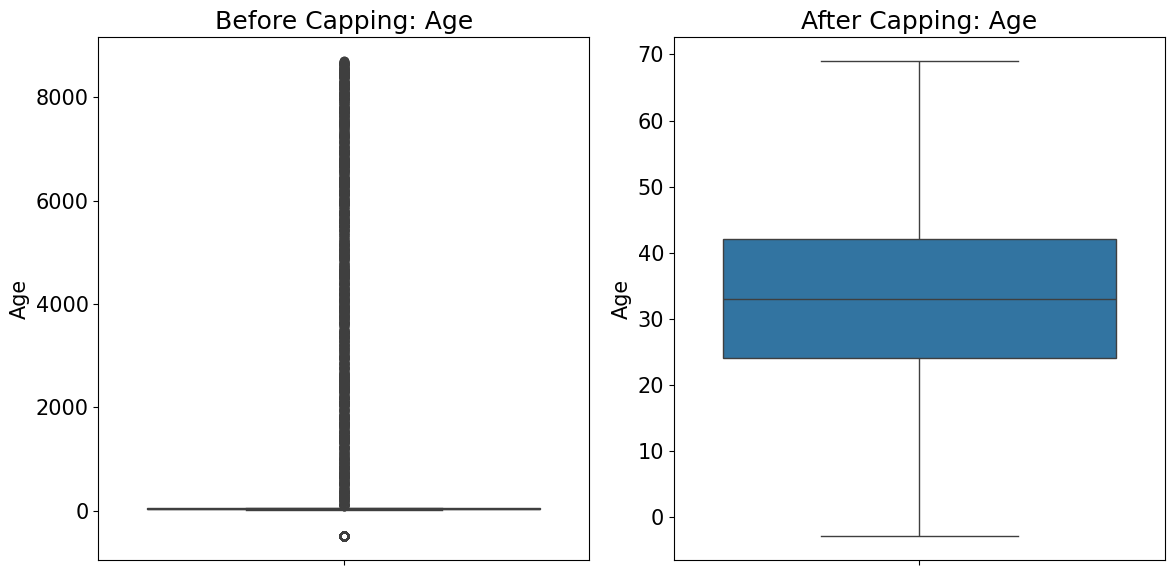

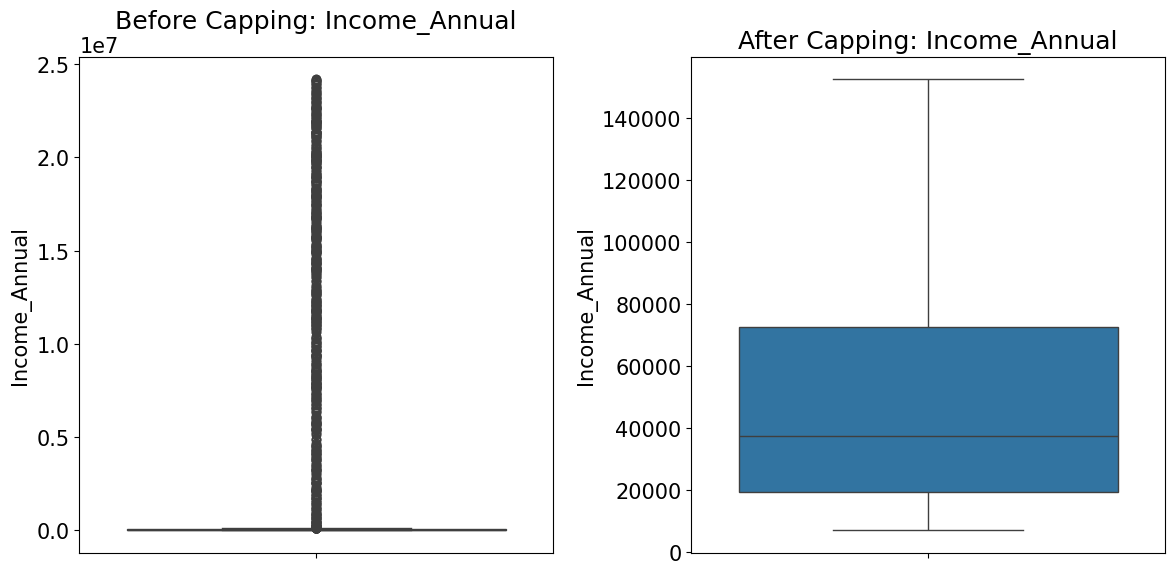

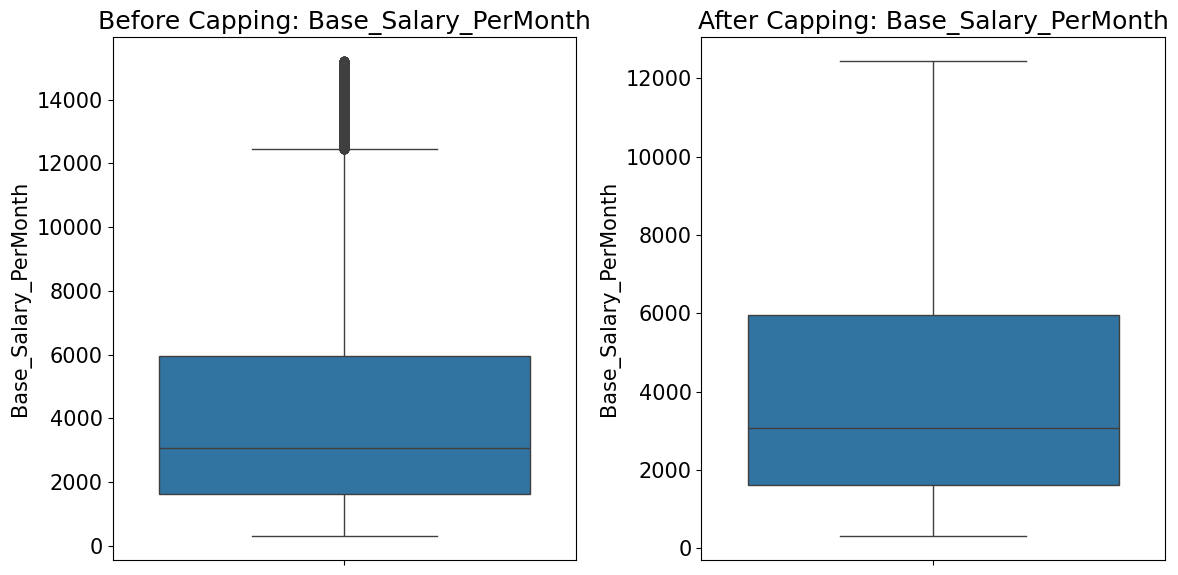

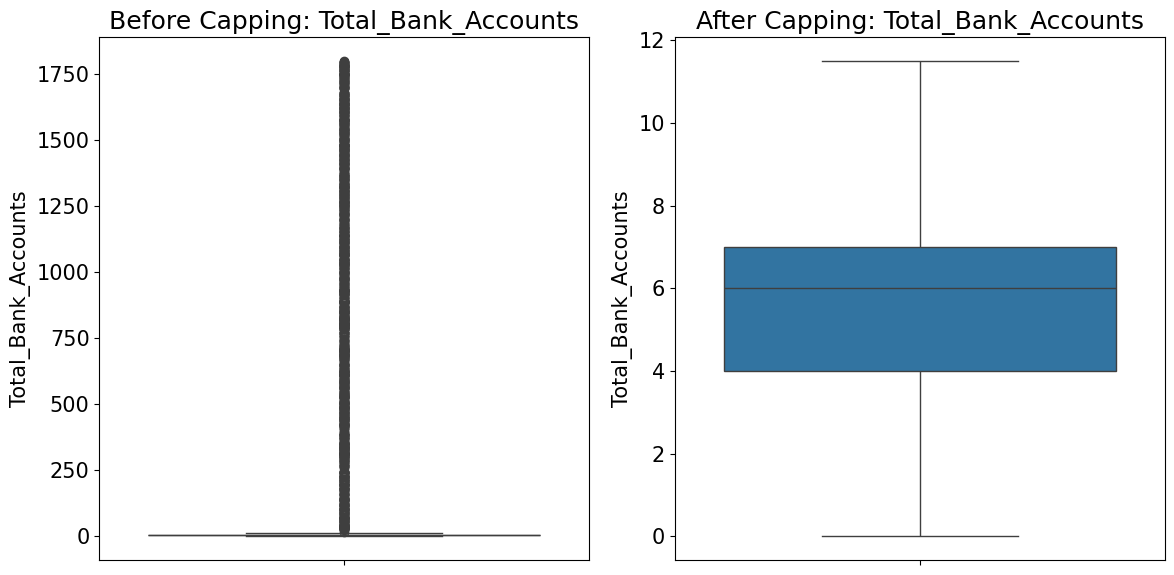

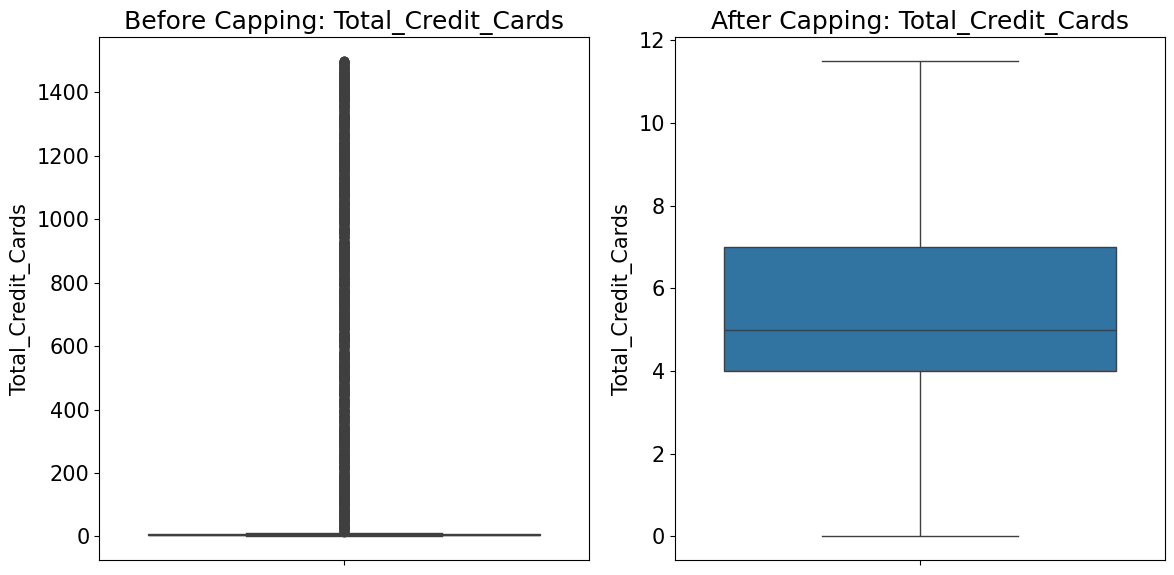

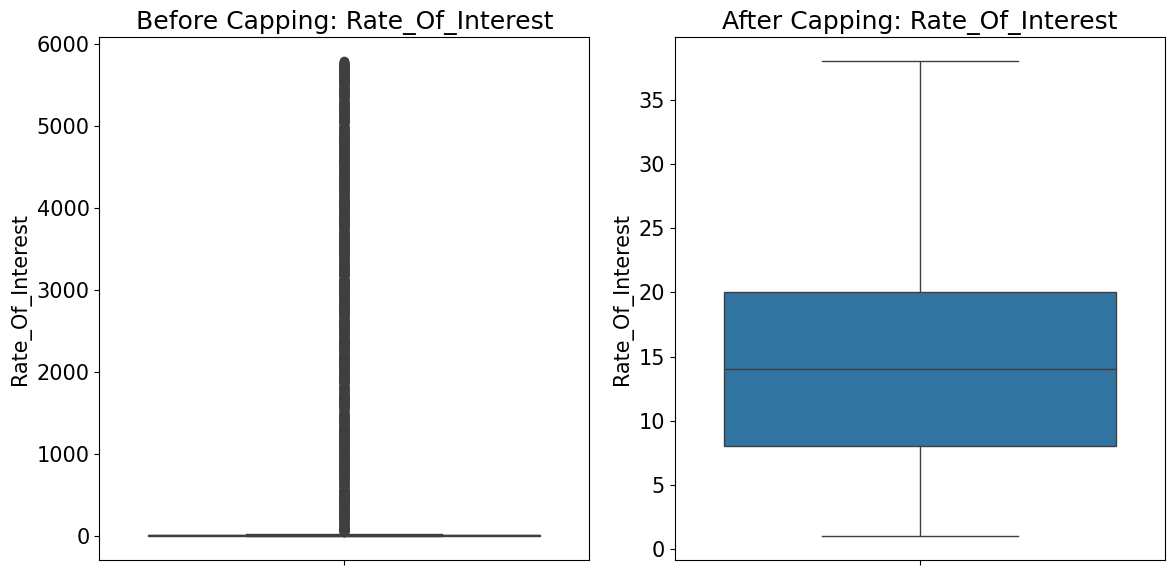

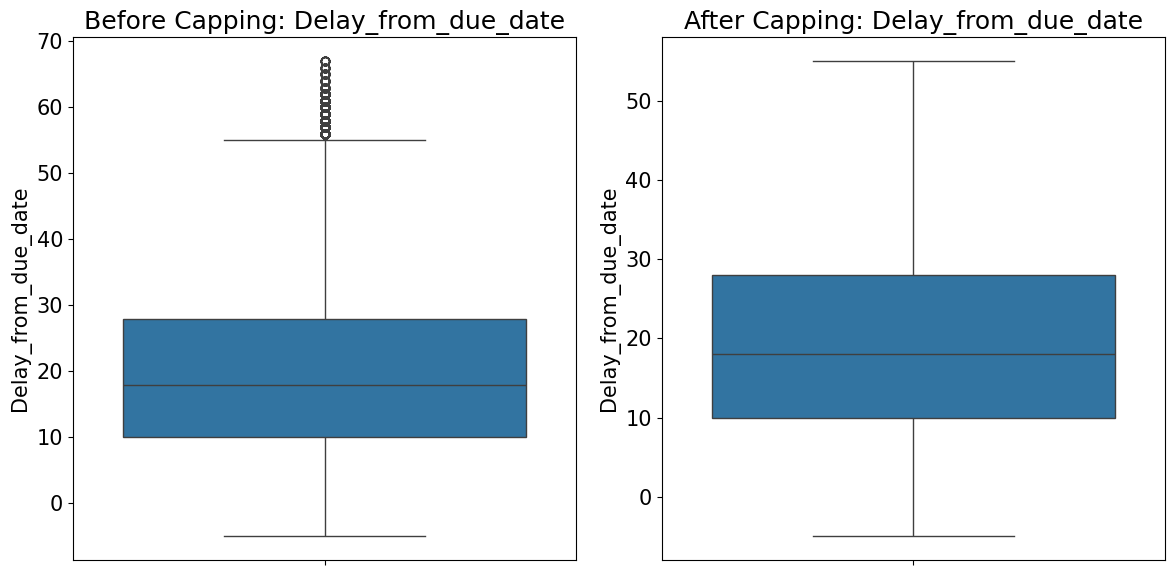

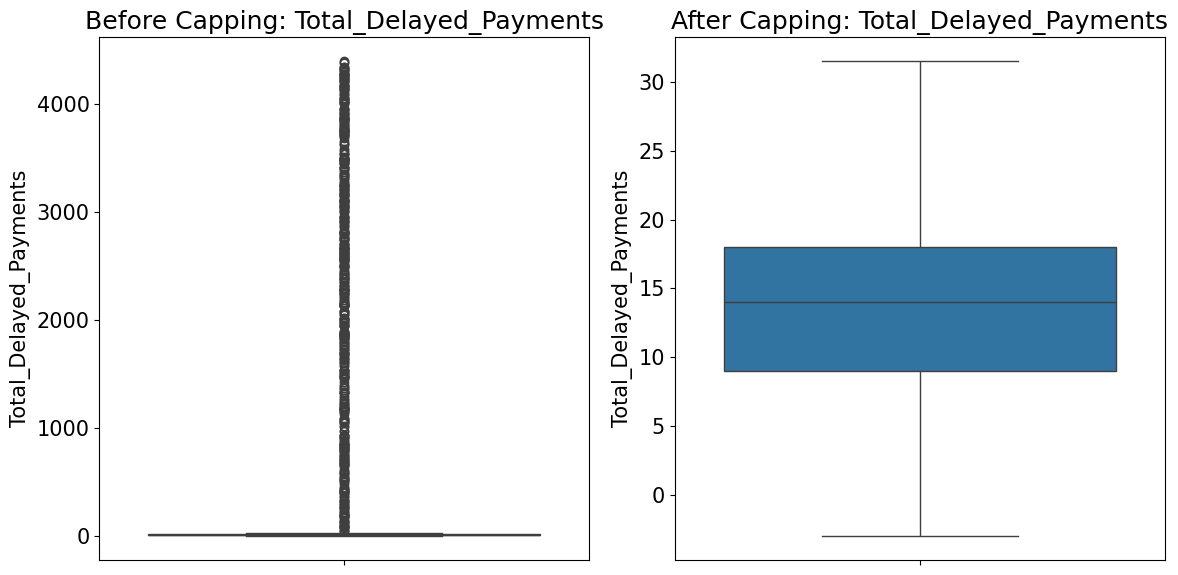

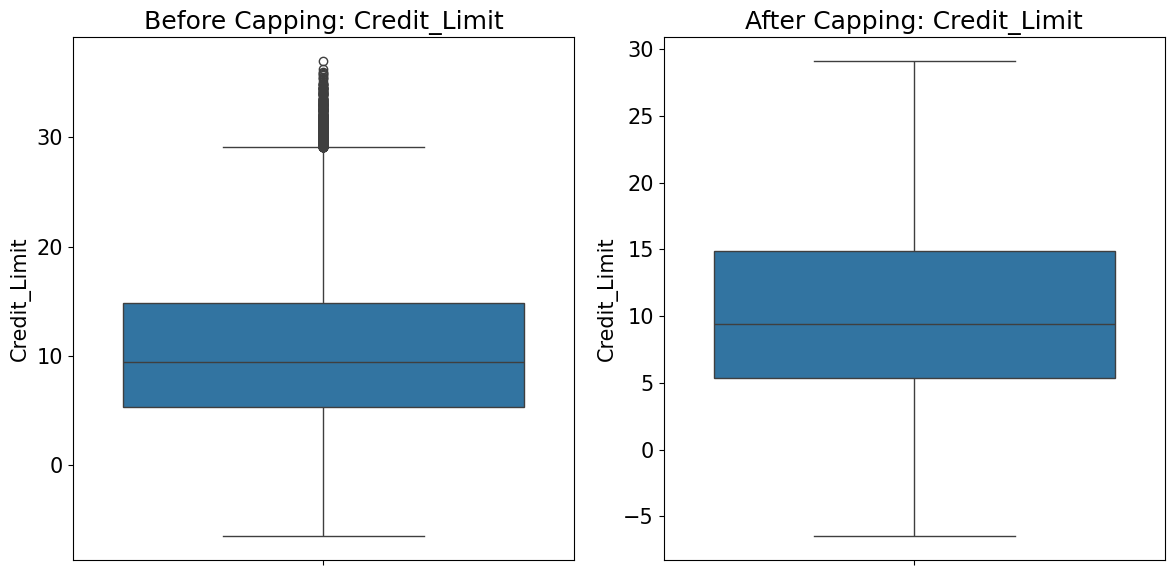

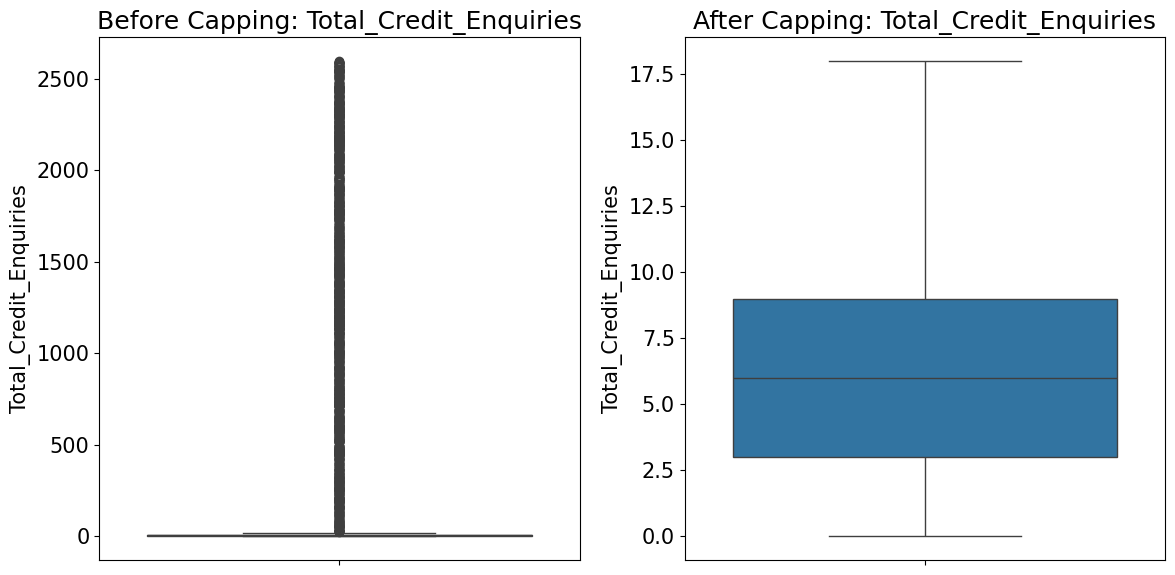

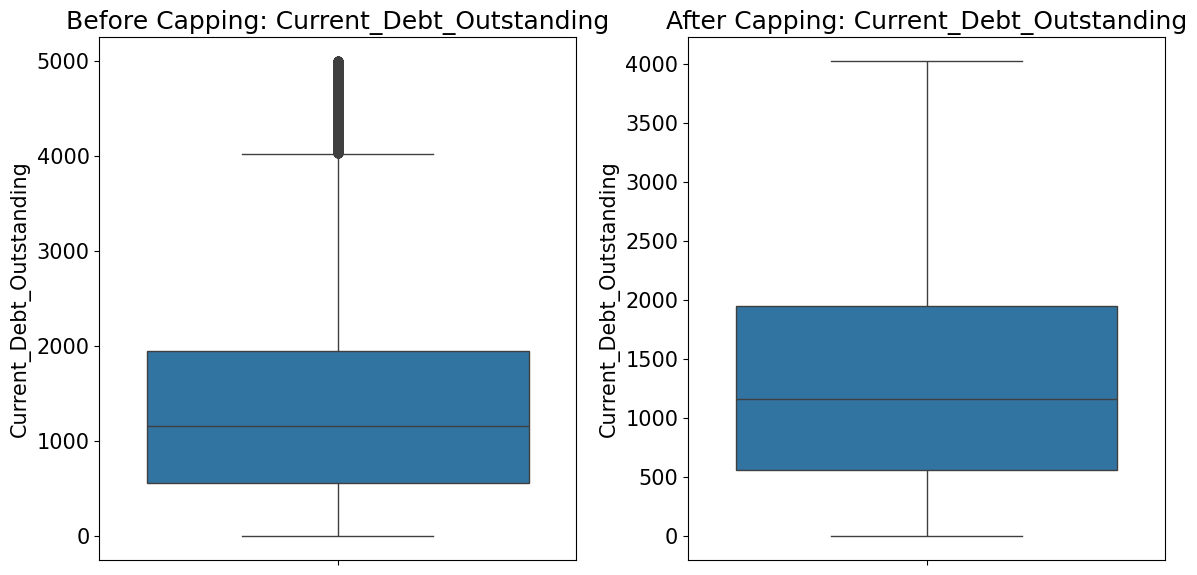

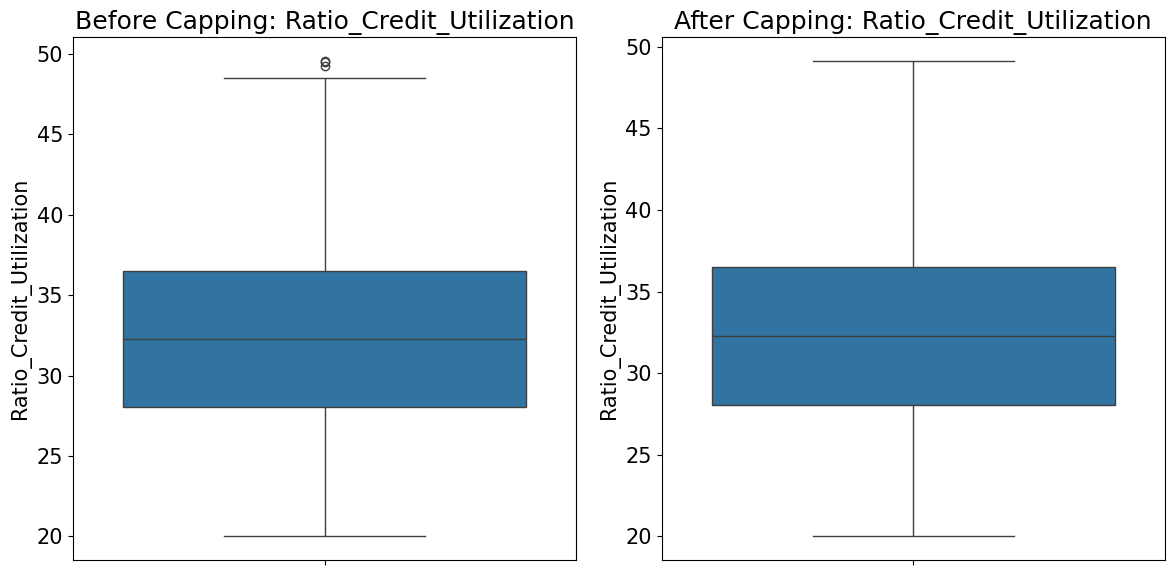

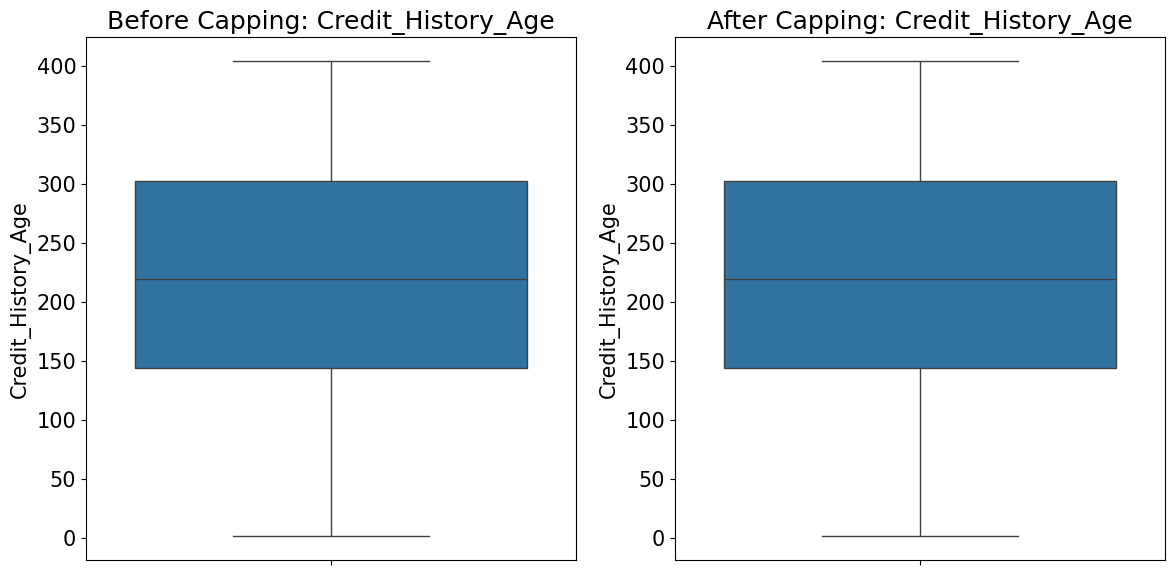

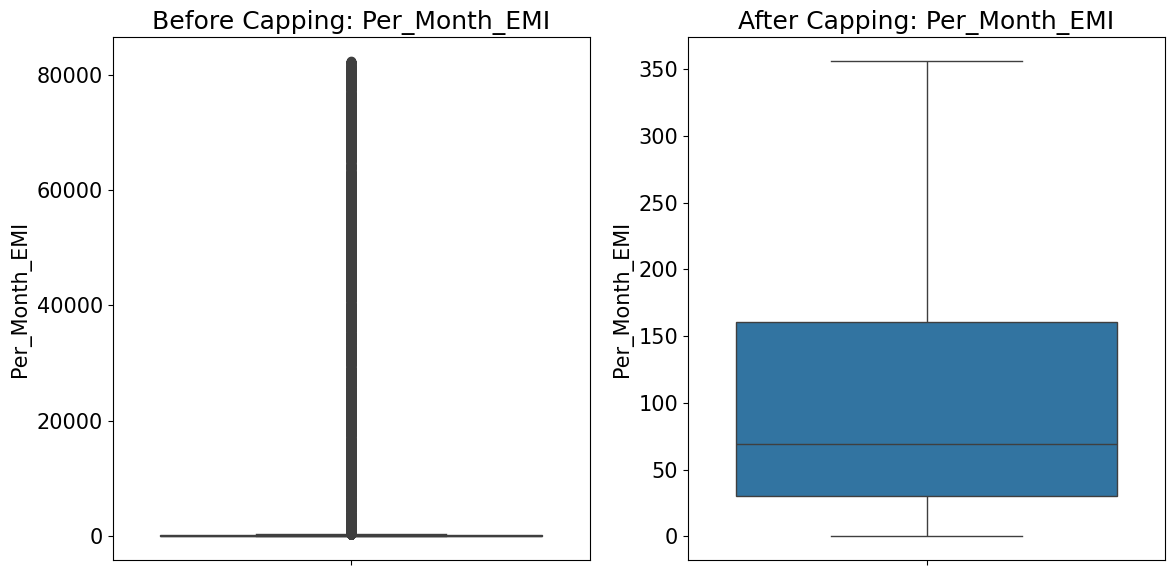

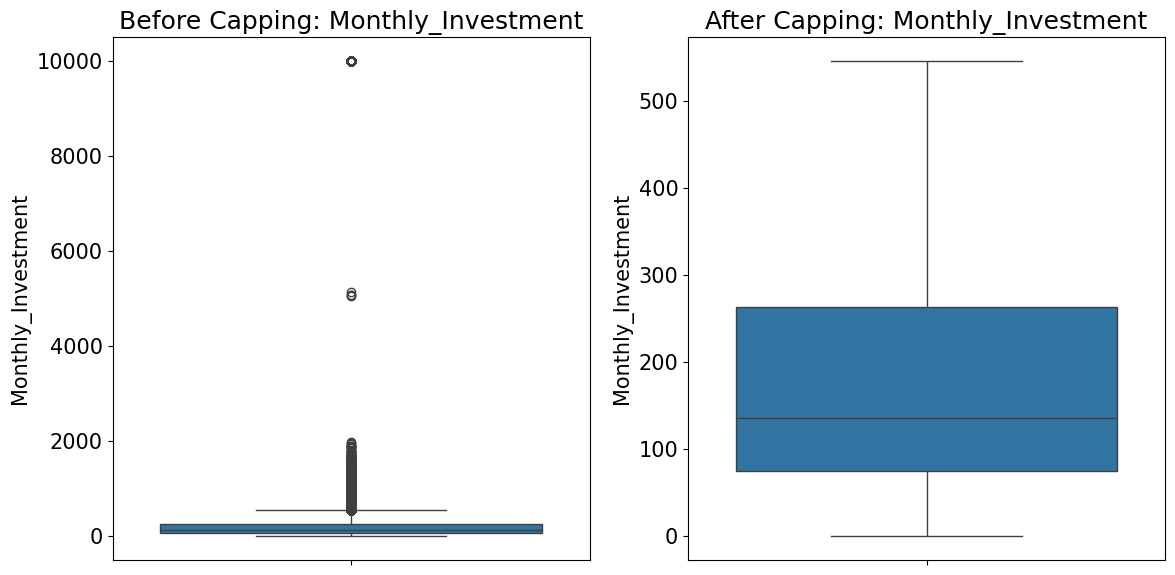

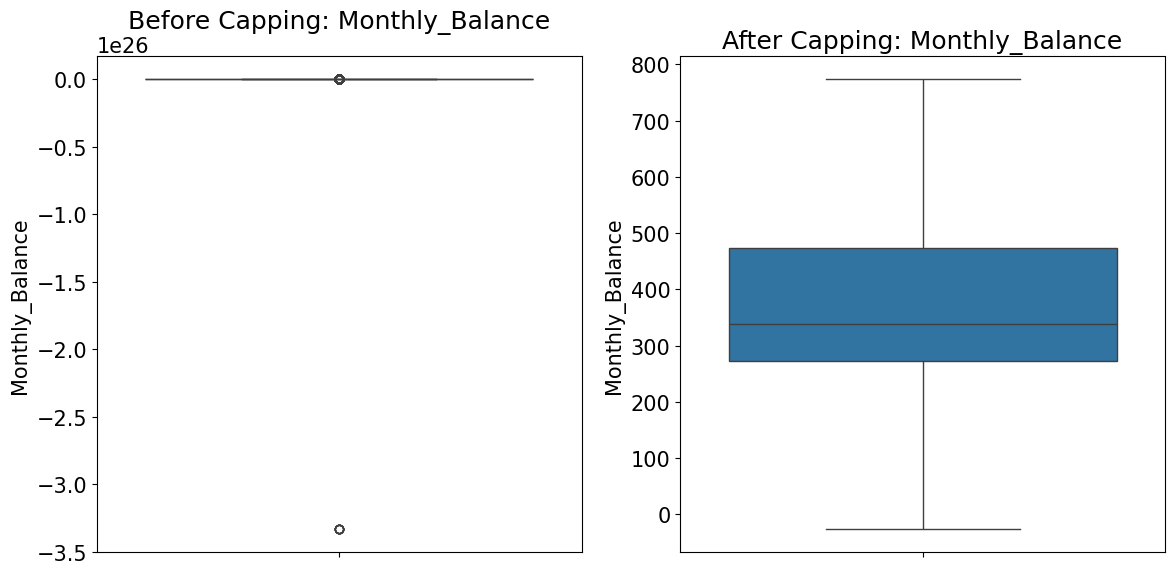

In [48]:
#Capping outliers
capped_train, capped_test = cap_outliers_iqr(train, test, numeric_cols )

# Data Visualization

In [49]:
#Create preprocess function without encodings for Data Visualisation
def preprocessDV(df):
    df = clean_dirty(df)

    df = drop_cols(df)

    df = convert_credit_history_to_months(df)

    df = fill_na_vals(df)
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

In [50]:
df1 = pd.read_csv('train.csv')
df1 = preprocessDV(df1)

/var/folders/dv/_t8zxwtd0tq5k52mjcg978n00000gn/T/ipykernel_1277/1941245335.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('train.csv')


In [51]:
df2 = df1.copy(deep=True)

In [52]:
# Apply IQR rule to each column in the provided list
for col in numeric_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
        
    # Calculate IQR
    IQR = Q3 - Q1
        
    # Determine outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    # Cap outliers in train data
    df2[col] = np.where(df2[col] < lower_bound, lower_bound, np.where(df2[col] > upper_bound, upper_bound, df2[col]))

## Univariate Analysis

### Age Distribution

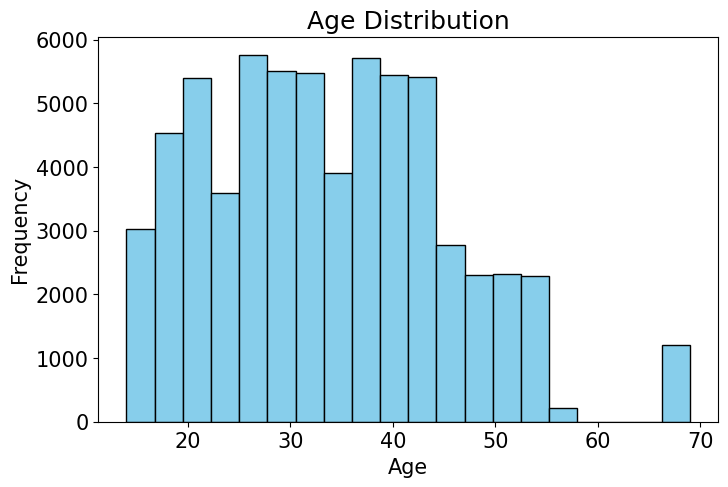

In [53]:
# Histogram for Age Distribution
plt.figure(figsize=(8, 5))
plt.hist(df2[df2['Age']>0]['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


**Inferences:**

1. **Age Range:** The plot suggests that the majority of individuals in the dataset fall within the age range of 20 to 50 years. There's are noticeable peak around the 25-40 years age group, indicating a significant presence of individuals in that specific age bracket.

2. **Distribution Shape:** The distribution appears to be slightly right-skewed, with a longer tail towards the higher age ranges. This suggests that there are fewer individuals in the older age groups compared to the younger ones.


### Annual Income and Monthly Base Salary Distribution

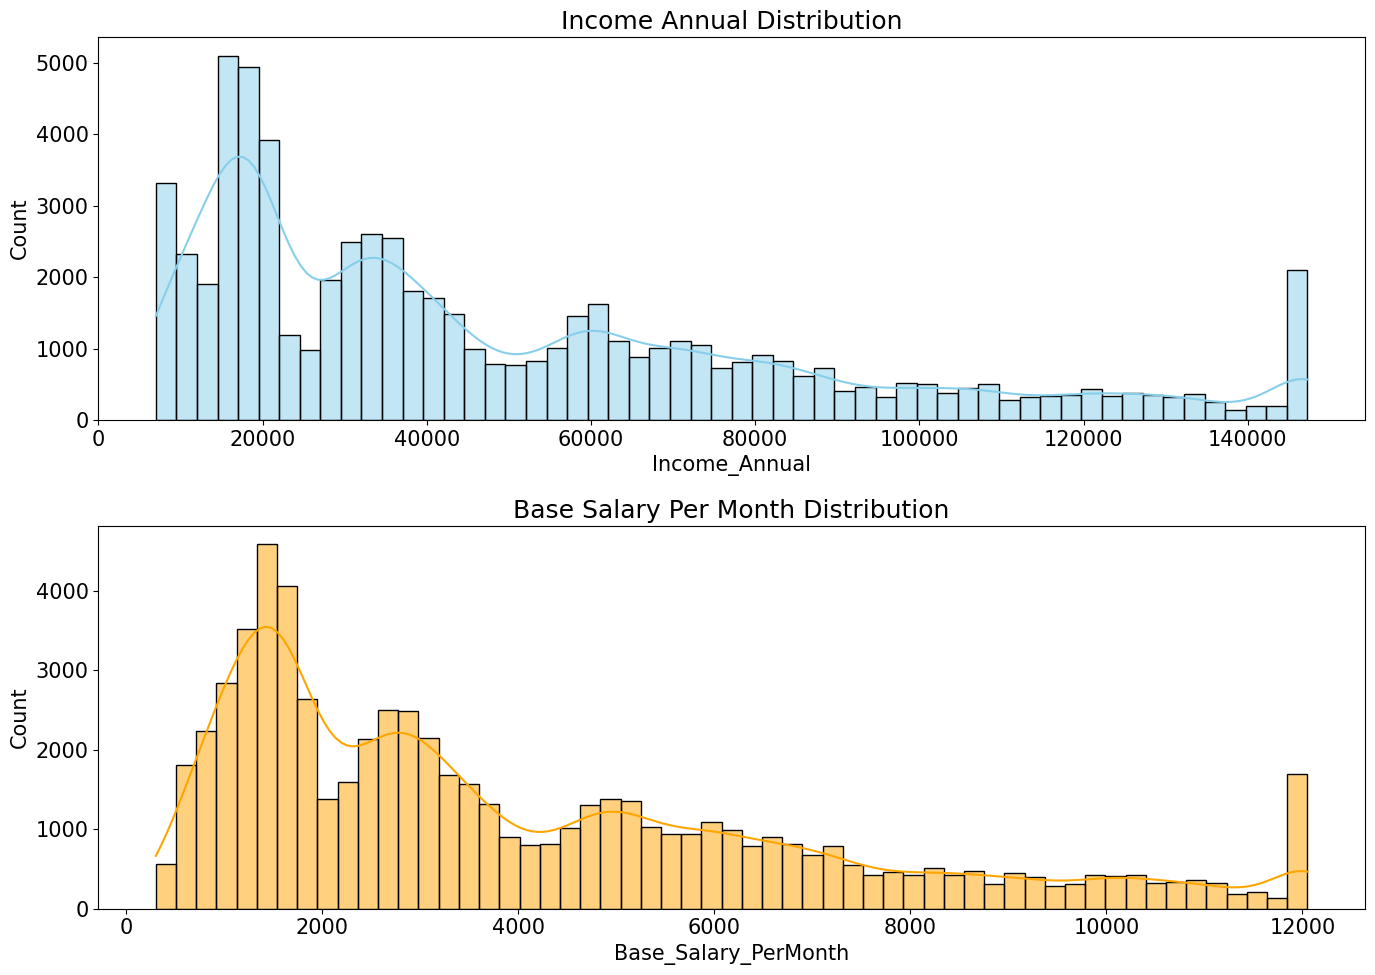

In [54]:
# Histograms for Income_Annual and Base_Salary_PerMonth
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Histogram for Income_Annual
sns.histplot(df2['Income_Annual'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Income Annual Distribution")

# Histogram for Base_Salary_PerMonth
sns.histplot(df2['Base_Salary_PerMonth'], kde=True, color='orange', ax=axes[1])
axes[1].set_title("Base Salary Per Month Distribution")

plt.tight_layout()
plt.show()


**Income Annual Distribution**

* **Shape:** The distribution appears to be right-skewed, with a long tail towards higher income values. This indicates that most individuals in the dataset have relatively lower annual incomes, while a smaller number of individuals have significantly higher incomes.

* **Peaks:** There are a few noticeable peaks in the distribution, suggesting certain income ranges might be more common or have a higher concentration of individuals.

**Base Salary Per Month Distribution**

* The distibution of base salary per month is similar to the annual income distribution,as expected, since base salary per month is related to annual salary (i.e. annual salary/12, generally). It is also right-skewed, with a longer tail towards higher salary values. This indicates that most individuals have lower monthly salaries, while a smaller number have significantly higher salaries.


### Distribution of Loan Types

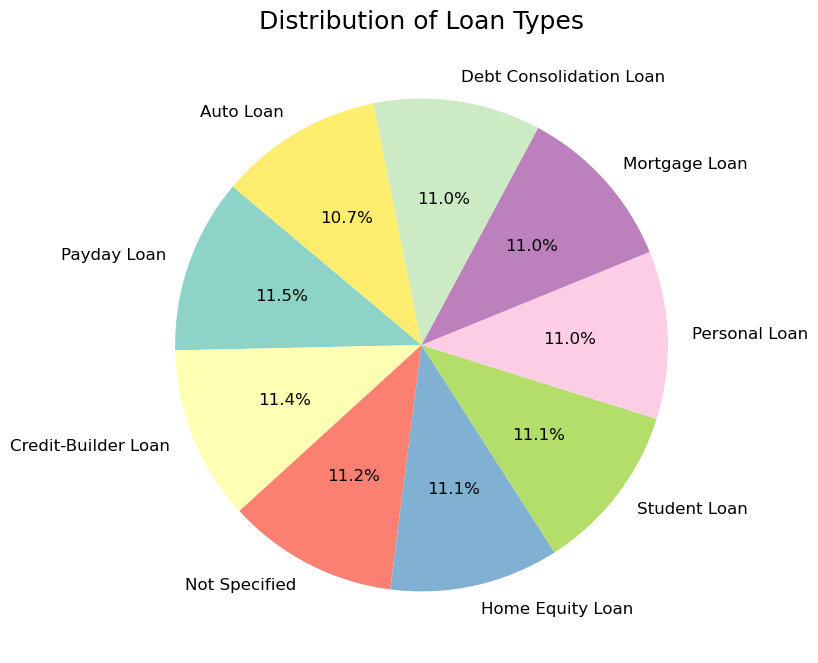

In [55]:
# Pie chart of unique loan types
temp_df = df2.copy(deep=True)
def extract_unique_loan_types(loan_entry):
    loans = [loan.strip() for loan in loan_entry.replace(' and ', ',').split(',') if loan.strip()]
    return loans

loan_type_series = temp_df['Loan_Type'].apply(extract_unique_loan_types).explode()

loan_type_counts = loan_type_series.value_counts()

plt.figure(figsize=(10, 8))
loan_type_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3', textprops={'fontsize': 12})
plt.ylabel('')
plt.title('Distribution of Loan Types')
plt.show()


**Inferences:**

* **Even Distribution:** The distribution of loan types seems relatively even, with no single type dominating significantly. This suggests a diverse range of loan needs within the dataset.

* **"Not Specified" Category:** A notable portion of the loans falls under the "Not Specified" category, indicating that information regarding the specific loan type is missing for some entries.


### EMI and Monthly Balance Distribution

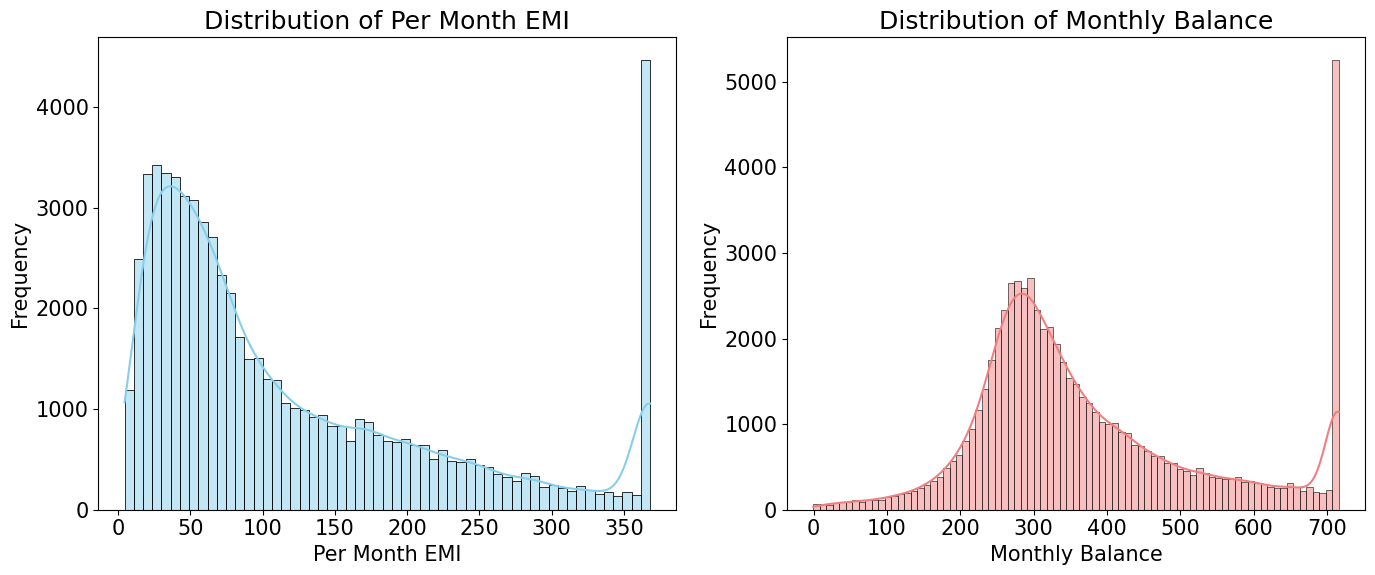

In [56]:
# Distribution plots for Per_Month_EMI and Monthly_Balance
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Per_Month_EMI
sns.histplot(df2['Per_Month_EMI'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Distribution of Per Month EMI")
axes[0].set_xlabel("Per Month EMI")
axes[0].set_ylabel("Frequency")

# Histogram for Monthly_Balance
sns.histplot(df2['Monthly_Balance'], kde=True, color='lightcoral', ax=axes[1])
axes[1].set_title("Distribution of Monthly Balance")
axes[1].set_xlabel("Monthly Balance")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


**Distribution of Per Month EMI:**

* **Shape:** The distribution appears to be right-skewed, with a long tail towards higher EMI values. This indicates that most individuals have lower monthly EMIs, while a smaller number have significantly higher EMIs.

* **Peaks:** The distribution shows a few distinct peaks, suggesting certain EMI ranges might be more common or preferred.

* There are some potential outliers visible in the higher EMI range. These could be individuals with exceptionally high monthly EMIs compared to the majority.

**Distribution of Monthly Balance:**

* **Shape:** The distribution of monthly balance also appears to be right-skewed, with a long tail towards higher balance values. This indicates that most individuals have lower monthly balances, while a smaller number have significantly higher balances.

* **Peaks:** The distribution shows a few distinct peaks, suggesting certain balance ranges might be more common.

* There are some potential outliers visible in the higher balance range. These could be individuals with exceptionally high monthly balances compared to the majority.


### Distribution of Credit Score

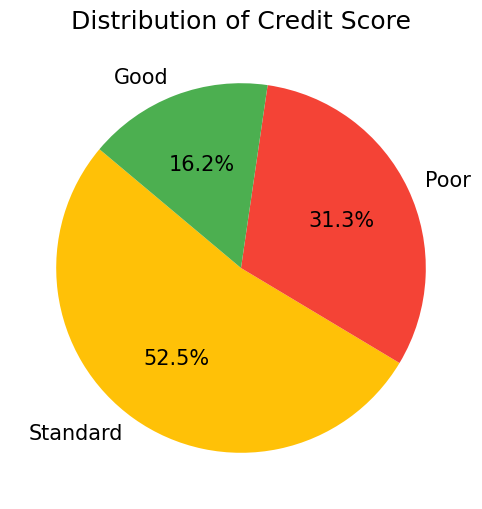

In [57]:
# Pie chart showing distribution of credit score
credit_score_counts = df2['Credit_Score'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(credit_score_counts, labels=credit_score_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FFC107', '#F44336', '#4CAF50'])
plt.title("Distribution of Credit Score")
plt.show()


## Multivariate Analysis

### Correlation Heatmap of Financial Metrics

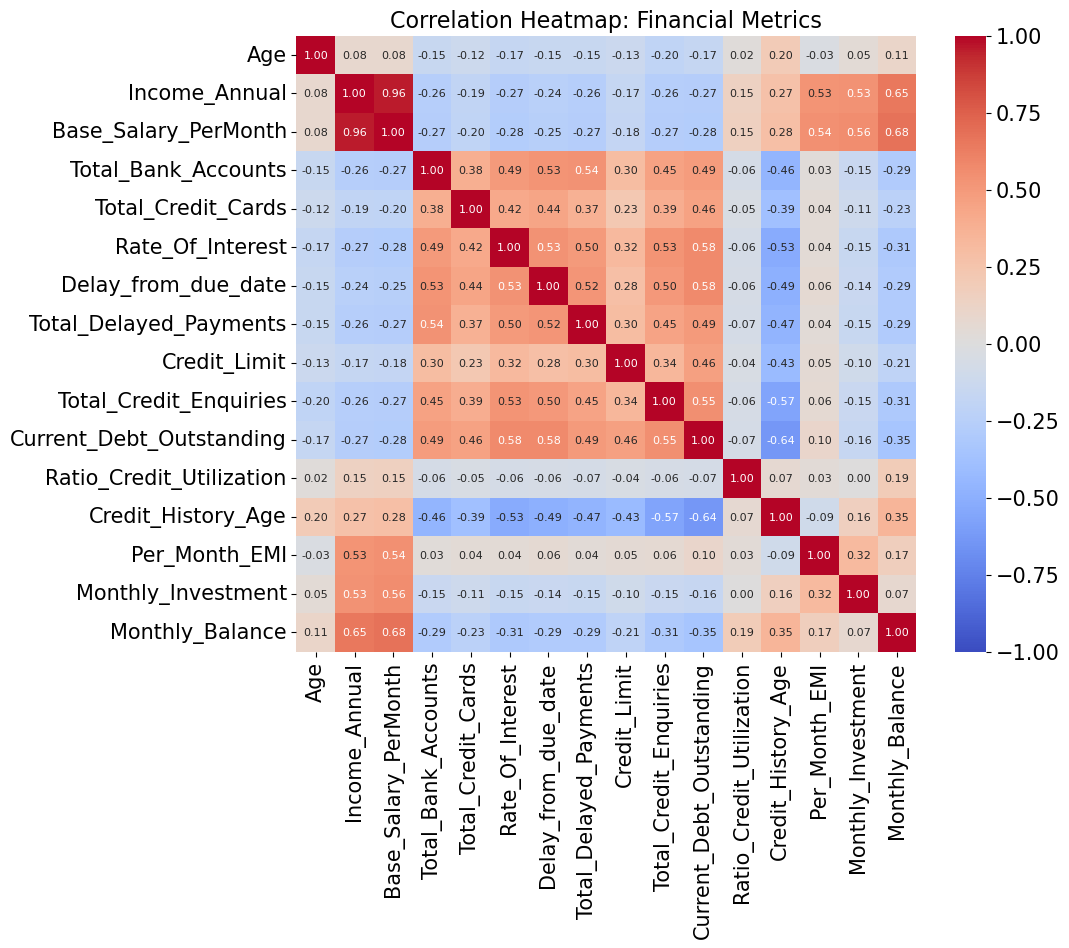

In [58]:
# Correlation Heatmap between numerical columns
corr_matrix = df2[[i for i in numeric_cols]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, annot_kws={'size': 8})
plt.title('Correlation Heatmap: Financial Metrics', fontsize=16)
plt.show()

**Inferences:**

**Positive Correlations**
1. **Annual Income & Monthly Base Salary (0.96)**: Strong link, as expected – higher salaries contribute directly to higher annual incomes.
2. **Current Debt Outstanding & Delay from Due Date (0.58)**: It suggests that individuals with higher outstanding debt tend to delay their payments more often. This may indicate financial strain or difficulty in managing debt repayment for those with larger amounts of debt.
3. **Current Debt Outstanding & Total Credit Enquiries (0.55)**: It suggests that individuals with higher outstanding debt are more likely to have a higher number of credit inquiries. This could indicate a tendency to seek additional credit or loans, possibly due to financial pressure from existing debt.

**Negative Correlations**
1. **Current Debt Outstanding & Credit History Age (-0.64)**: It suggests that individuals with a longer credit history tend to have lower outstanding debt. This may imply that those with more established credit histories are better at managing debt, or have paid off loans over time, resulting in lower current debt levels.
2. **Total Credit Enquiries & Credit History Age (-0.57)**: Individuals with longer credit histories make fewer credit enquiries, suggesting stability.
3. **Rate Of Interest & Credit History Age (-0.53)**: It suggests that individuals with longer credit histories are often charged lower interest rates. This may indicate that lenders view a longer credit history as a sign of creditworthiness, leading to more favorable interest rates for these individuals.

### Credit Score Distribution by Profession

<Figure size 1400x600 with 0 Axes>

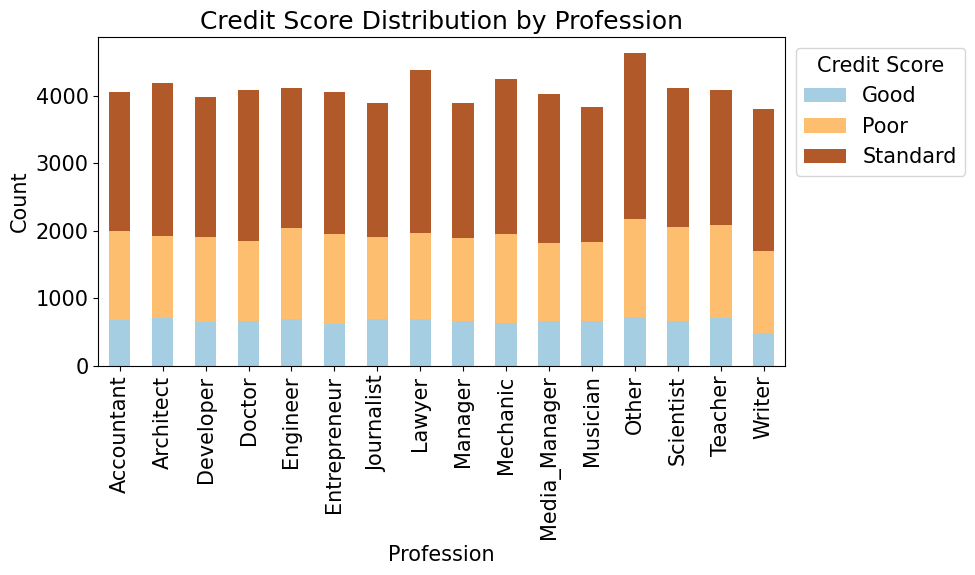

In [59]:
# Stacked Bar Chart for Profession and Credit Score
plt.figure(figsize=(14, 6))
profession_credit_ct = pd.crosstab(df2['Profession'], df2['Credit_Score'])
profession_credit_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title("Credit Score Distribution by Profession")
plt.xlabel("Profession")
plt.ylabel("Count")
plt.legend(title='Credit Score', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Inferences**:

* **"Standard" Dominance:** The "Standard" credit score category is the most prevalent across all professions. This suggests a general level of financial responsibility and creditworthiness among the individuals in the dataset. 
* **Variability Across Professions:** While "Standard" is the majority, there are noticeable variations in the distribution of "Good" and "Poor" scores across different professions. This implies that certain professions might have inherent factors influencing creditworthiness, such as income stability, job security, or industry-specific financial challenges.

* **High-Creditworthiness Professions:**
    * **Accountant, Architect, Engineer, Lawyer, Teacher:** These professions seem to have a relatively higher proportion of "Good" credit scores. This could be attributed to factors like stable income, financial literacy, and career stability.

* **Moderate-Creditworthiness Professions:**
    * **Journalist, Manager:** These professions show a balanced distribution of "Good" and "Standard" scores, indicating a moderate level of creditworthiness.
    * **Mechanic, Musician, Media:** These professions have a higher proportion of "Standard" scores, suggesting a more conservative approach to credit utilization.

* **Lower-Creditworthiness Professions:**
    * **Writer:** These professions have a slightly higher proportion of "Poor" credit scores, which might be influenced by factors like lower income levels, irregular income streams, or higher debt burdens. 



### Credit Score Distribution by Payment of Minimum Amount

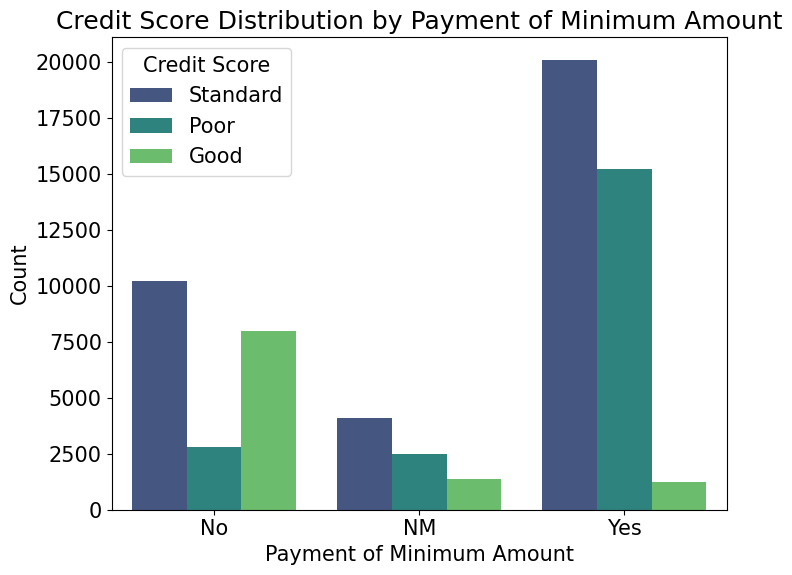

In [60]:
# Set up a larger plot style for visibility
plt.figure(figsize=(14, 6))

# Count plot for Payment_of_Min_Amount by Credit Score
plt.subplot(1, 2, 1)
sns.countplot(data=df2, x='Payment_of_Min_Amount', hue='Credit_Score', palette='viridis')
plt.title("Credit Score Distribution by Payment of Minimum Amount")
plt.xlabel("Payment of Minimum Amount")
plt.ylabel("Count")
plt.legend(title="Credit Score")

plt.tight_layout()
plt.show()


**Inferences**
1. **Most Common Response for Standard Credit Score**: 
   - The majority of individuals with a `Standard` credit score tend to pay the minimum amount (`Yes`). This could indicate a habit of managing debts by meeting only the minimal requirements, which may affect long-term financial stability and keep them in a `Standard` credit range.

2. **Behavior of Individuals with Poor Credit Score**:
   - Among those with a `Poor` credit score, a significant portion pays the minimum amount (`Yes`). However, there’s also a noticeable group that does not pay (`No`). This split may suggest that some in the `Poor` category are attempting to manage their debts by paying minimally, while others struggle with making payments entirely. This inconsistent payment behavior might explain why they are categorized as `Poor`.

3. **Good Credit Score and Payment Habits**:
   - Interestingly, a substantial portion of individuals with a `Good` credit score do not opt to pay only the minimum (`No`). This behavior aligns with responsible financial management, as paying more than the minimum can reduce overall debt and improve financial health, contributing to a `Good` credit score. 
   - Very few individuals with a `Good` credit score appear in the `Yes` category, reinforcing the notion that those with strong credit habits typically pay more than the minimum due.

4. **Unusual Behavior in NM Category**:
   - The `NM` (presumably meaning "Not Mentioned" or similar) category shows fewer individuals across all credit scores, but especially for those with a `Standard` and `Poor` score. This group may represent individuals who have irregular or unknown payment patterns, potentially impacting their ability to improve their credit scores.

5. **Overall Trend**:
   - We can see a correlation between credit score and payment behavior. Those who pay only the minimum tend to have `Standard` or `Poor` credit scores, while individuals with a `Good` score are more likely to pay more than the minimum. 

### Payment Behaviour Impact on Credit Score

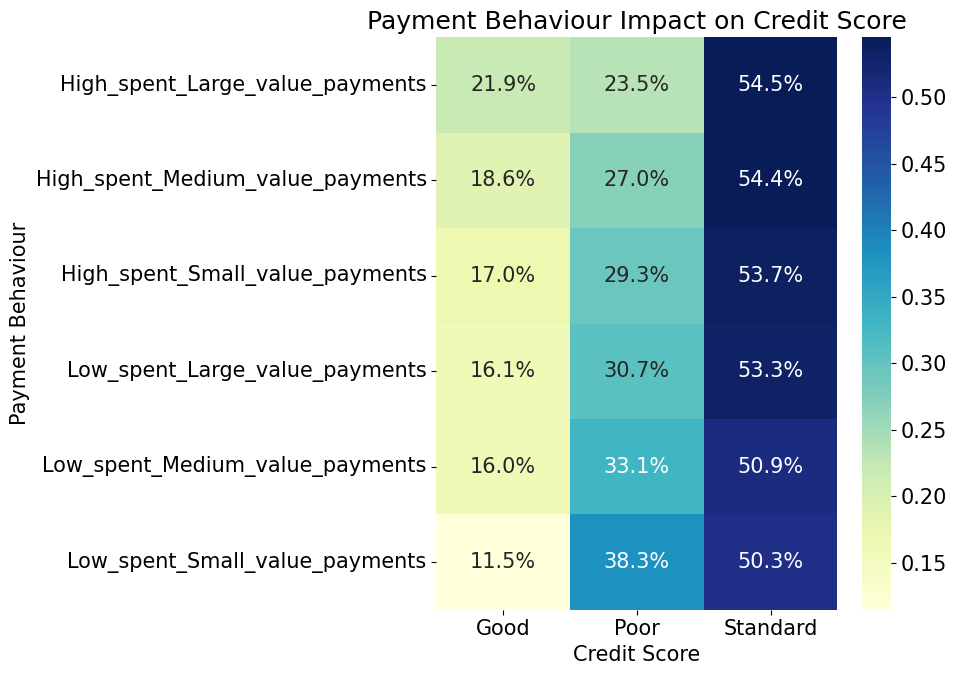

In [61]:
# Cross-tabulation for Payment Behaviour and Credit Score
payment_behaviour_ct = pd.crosstab(df2['Payment_Behaviour'], df2['Credit_Score'], normalize='index')

# Heatmap for Payment Behaviour patterns by Credit Score
plt.subplot(1, 2, 2)
sns.heatmap(payment_behaviour_ct, annot=True, cmap="YlGnBu", cbar=True, fmt=".1%")
plt.title("Payment Behaviour Impact on Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Payment Behaviour")

plt.tight_layout()
plt.show()

**Inferences**
1. **Dominance of Standard Credit Score**:
   - Across all payment behaviors, a majority of individuals fall into the `Standard` credit score category. This suggests that regardless of spending and payment size, most customers have a moderate credit score, possibly indicating average financial behavior.

2. **Good Credit Score and High Spending**:
   - For payment behaviors involving high spending on large, medium, and small payments, individuals with a `Good` credit score make up a notable portion, though they’re still the minority. For instance, `High_spent_Large_value_payments` includes about 21.9% with a `Good` credit score, while `High_spent_Medium_value_payments` includes 18.6% with a `Good` credit score.
   - This trend may suggest that those who spend more and can afford larger payments are more likely to maintain a better credit score. However, the fact that they are not the majority indicates that other factors also play a role in achieving a `Good` credit score.

3. **Poor Credit Score and Low Spending**:
   - Payment behaviors involving low spending, especially `Low_spent_Small_value_payments`, show a higher concentration of individuals with a `Poor` credit score (38.3%). Similarly, `Low_spent_Medium_value_payments` has 33.1% in the `Poor` category.
   - This indicates that individuals who tend to spend less and make smaller payments are more likely to have poor credit. This correlation could reflect either lower financial means or poor financial management, leading to a low credit score.

4. **High Spending and Large Payments Linked to Poor and Standard Credit Scores**:
   - Even in cases of high spending, like `High_spent_Large_value_payments`, there is still a significant proportion of individuals with `Poor` credit scores (23.5%). This could suggest that high spending does not necessarily equate to better creditworthiness, as spending patterns without consistent and timely repayments might not improve credit scores.
   - The highest percentage for `High_spent_Large_value_payments` falls under `Standard` (54.5%), indicating that most high spenders have moderate creditworthiness.

### Distribution of Credit Score by Total Credit Enquiries

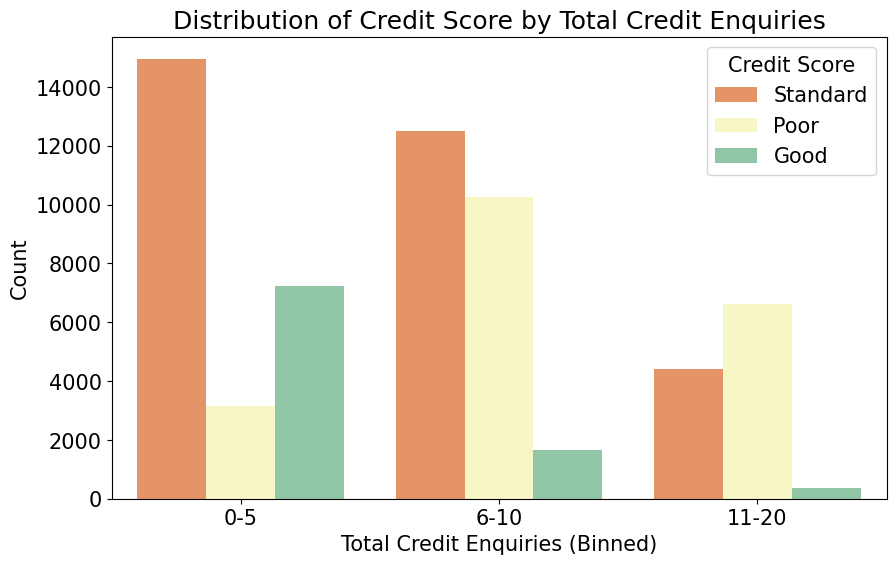

In [62]:
# Binning Total_Credit_Enquiries and plotting
df2['Credit_Enquiries_Binned'] = pd.cut(df2['Total_Credit_Enquiries'], bins=[0, 5, 10, 20], labels=['0-5', '6-10', '11-20'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Credit_Enquiries_Binned', hue='Credit_Score', palette='Spectral')
plt.title("Distribution of Credit Score by Total Credit Enquiries")
plt.xlabel("Total Credit Enquiries (Binned)")
plt.ylabel("Count")
plt.legend(title="Credit Score")
plt.show()


**Inferences**
- **High Count of Standard and Good Credit Scores in Low Enquiry Range (0-5)**:
   The majority of individuals with `Standard` and `Good` credit scores fall in the 0-5 credit enquiry range, with over 14,000 counts. This suggests that individuals with moderate and good credit scores tend to have fewer credit enquiries, possibly due to moderate borrowing needs or controlled credit usage.

- **Poor Credit Scores Increase with Enquiries**:
   The proportion of `Poor` credit scores grows with the number of enquiries. In the 6-10 range, `Poor` credit scores almost match the `Standard` scores, and in the 11-20 range, `Poor` credit scores even exceed `Standard`. This pattern suggests that a higher number of credit enquiries is correlated with poor credit scores, which might indicate frequent credit applications due to financial distress, higher credit dependency, or difficulty in securing credit.

- **Diminishing Count of Good Credit Scores with Increased Enquiries**:
   As credit enquiries increase (6-10 and 11-20 ranges), the count of `Good` credit scores declines sharply, showing that higher enquiries are less common among individuals with good credit. This reinforces the notion that minimal credit enquiries are associated with better credit standing.

- **Implications for Creditworthiness**:
   The data suggests a strong negative correlation between the number of credit enquiries and credit score quality. Fewer enquiries generally correspond to better credit scores, while a larger number of enquiries may signal riskier financial behavior or credit dependency.

### Credit Score Distribution by Credit Mix

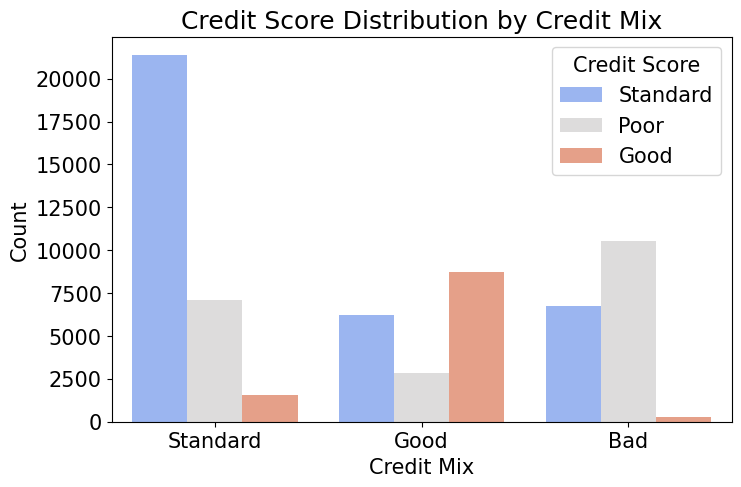

In [63]:
# Bar Chart of Credit Mix grouped by Credit Score
plt.figure(figsize=(8, 5))
sns.countplot(data=df2, x='Credit_Mix', hue='Credit_Score', palette='coolwarm')
plt.title("Credit Score Distribution by Credit Mix")
plt.xlabel("Credit Mix")
plt.ylabel("Count")
plt.legend(title="Credit Score")
plt.show()


**Inferences**
1. **Standard Credit Mix**:
   - The majority of individuals with a *standard credit mix* fall under the *standard credit score* category, with over 20,000 cases. 
   - There are significantly fewer individuals with *poor* and *good* credit scores within this mix, suggesting that a standard credit mix is commonly associated with average or standard credit scores.

2. **Good Credit Mix**:
   - Among individuals with a *good credit mix*, most have a *good credit score*, followed closely by those with a *standard credit score*.
   - This indicates that a good credit mix is often correlated with higher credit scores, implying better financial management or a more balanced credit profile.

3. **Bad Credit Mix**:
   - The *bad credit mix* category is predominantly represented by individuals with a *poor credit score*, with a smaller number having a *standard credit score*.
   - Very few individuals with a bad credit mix have a *good credit score*, which implies that a bad credit mix is generally associated with lower credit scores and possibly poor financial behavior.

4. **Summary:**
A standard credit mix is most common and generally aligns with standard credit scores. A good credit mix tends to correlate with higher scores, while a bad credit mix is strongly linked to lower credit scores, highlighting the influence of credit mix on creditworthiness.

# Model Selection

In [64]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import EasyEnsembleClassifier

classifiers = {
    #"MultinomialNB": MultinomialNB(), #Naive Bayes does not work on -ve values
    #"BernoulliNB": BernoulliNB(),
    #"GaussianNB": GaussianNB(),
    #Baseline Classifiers
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(n_jobs=-1),
    "RandomForestClassifier": RandomForestClassifier(random_state=42,n_jobs=-1),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=42,algorithm='SAMME'),
    "XGBClassifier": XGBClassifier(random_state=42,n_jobs=-1),
    #EasyEnsembleClassifier
    "Easy_DecisionTreeClassifier": EasyEnsembleClassifier(random_state=42,estimator=DecisionTreeClassifier(random_state=42)),
    "Easy_KNeighborsClassifier": EasyEnsembleClassifier(random_state=42,estimator=KNeighborsClassifier(n_jobs=-1)),
    "Easy_RandomForestClassifier": EasyEnsembleClassifier(random_state=42,estimator=RandomForestClassifier(random_state=42,n_jobs=-1)),
    "Easy_AdaBoostClassifier": EasyEnsembleClassifier(random_state=42,estimator=AdaBoostClassifier(random_state=42,algorithm='SAMME')),
    "Easy_XGBClassifier": EasyEnsembleClassifier(random_state=42,estimator=XGBClassifier(random_state=42,n_jobs=-1)),
    # Random Oversampling
    "Over_DecisionTreeClassifier": ImbPipeline([
        ('oversample', RandomOverSampler(random_state=42)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    "Over_KNeighborsClassifier": ImbPipeline([
        ('oversample', RandomOverSampler(random_state=42)),
        ('classifier', KNeighborsClassifier(n_jobs=-1))
    ]),
    "Over_RandomForestClassifier": ImbPipeline([
        ('oversample', RandomOverSampler(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
    ]),
    "Over_AdaBoostClassifier": ImbPipeline([
        ('oversample', RandomOverSampler(random_state=42)),
        ('classifier', AdaBoostClassifier(random_state=42, algorithm='SAMME'))
    ]),
    "Over_XGBClassifier": ImbPipeline([
        ('oversample', RandomOverSampler(random_state=42)),
        ('classifier', XGBClassifier(random_state=42, n_jobs=-1))
    ]),

    # Random Undersampling
    "Under_DecisionTreeClassifier": ImbPipeline([
        ('undersample', RandomUnderSampler(random_state=42)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    "Under_KNeighborsClassifier": ImbPipeline([
        ('undersample', RandomUnderSampler(random_state=42)),
        ('classifier', KNeighborsClassifier(n_jobs=-1))
    ]),
    "Under_RandomForestClassifier": ImbPipeline([
        ('undersample', RandomUnderSampler(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
    ]),
    "Under_AdaBoostClassifier": ImbPipeline([
        ('undersample', RandomUnderSampler(random_state=42)),
        ('classifier', AdaBoostClassifier(random_state=42, algorithm='SAMME'))
    ]),
    "Under_XGBClassifier": ImbPipeline([
        ('undersample', RandomUnderSampler(random_state=42)),
        ('classifier', XGBClassifier(random_state=42, n_jobs=-1))
    ]),

    # SMOTE
    "SMOTE_DecisionTreeClassifier": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    "SMOTE_KNeighborsClassifier": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', KNeighborsClassifier(n_jobs=-1))
    ]),
    "SMOTE_RandomForestClassifier": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
    ]),
    "SMOTE_AdaBoostClassifier": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', AdaBoostClassifier(random_state=42, algorithm='SAMME'))
    ]),
    "SMOTE_XGBClassifier": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', XGBClassifier(random_state=42, n_jobs=-1))
    ]),

    # ADASYN
    "ADASYN_DecisionTreeClassifier": ImbPipeline([
        ('adasyn', ADASYN(random_state=42)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    "ADASYN_KNeighborsClassifier": ImbPipeline([
        ('adasyn', ADASYN(random_state=42)),
        ('classifier', KNeighborsClassifier(n_jobs=-1))
    ]),
    "ADASYN_RandomForestClassifier": ImbPipeline([
        ('adasyn', ADASYN(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
    ]),
    "ADASYN_AdaBoostClassifier": ImbPipeline([
        ('adasyn', ADASYN(random_state=42)),
        ('classifier', AdaBoostClassifier(random_state=42, algorithm='SAMME'))
    ]),
    "ADASYN_XGBClassifier": ImbPipeline([
        ('adasyn', ADASYN(random_state=42)),
        ('classifier', XGBClassifier(random_state=42, n_jobs=-1))
    ]),

    # Borderline SMOTE
    "BorderlineSMOTE_DecisionTreeClassifier": ImbPipeline([
        ('borderline_smote', BorderlineSMOTE(random_state=42)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    "BorderlineSMOTE_KNeighborsClassifier": ImbPipeline([
        ('borderline_smote', BorderlineSMOTE(random_state=42)),
        ('classifier', KNeighborsClassifier(n_jobs=-1))
    ]),
    "BorderlineSMOTE_RandomForestClassifier": ImbPipeline([
        ('borderline_smote', BorderlineSMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
    ]),
    "BorderlineSMOTE_AdaBoostClassifier": ImbPipeline([
        ('borderline_smote', BorderlineSMOTE(random_state=42)),
        ('classifier', AdaBoostClassifier(random_state=42, algorithm='SAMME'))
    ]),
    "BorderlineSMOTE_XGBClassifier": ImbPipeline([
        ('borderline_smote', BorderlineSMOTE(random_state=42)),
        ('classifier', XGBClassifier(random_state=42, n_jobs=-1))
    ])
}

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, cross_validate


# Defining classifiers


X = train.drop(columns=['Credit_Score'])
y = train['Credit_Score']


# Initialize Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10)

# Initialize a DataFrame to store results
selection_df = pd.DataFrame(columns=["Model", "F1 Score (Macro)"])


# Iterate over each classifier
for model_name, model in classifiers.items():
    print(f'{model_name} Started')
    scores = cross_validate(
        model, X, y,
        scoring='f1_macro',
        cv=stratified_kfold,
        n_jobs=-1
    )

    # Calculate mean scores for each metric
    
    f1_macro_mean = scores['test_score'].mean()


    
    # Append results to the DataFrame
    temp = {
        "Model": model_name,
        "F1 Score (Macro)": f1_macro_mean,
    }

    # Add F1 scores for each class to the temp dictionary
    
    selection_df = pd.concat([selection_df, pd.DataFrame([temp])])
    print(f'{model_name} Finished')


DecisionTreeClassifier Started
DecisionTreeClassifier Finished
KNeighborsClassifier Started
KNeighborsClassifier Finished
RandomForestClassifier Started
RandomForestClassifier Finished
AdaBoostClassifier Started
AdaBoostClassifier Finished
XGBClassifier Started
XGBClassifier Finished
Easy_DecisionTreeClassifier Started
Easy_DecisionTreeClassifier Finished
Easy_KNeighborsClassifier Started
Easy_KNeighborsClassifier Finished
Easy_RandomForestClassifier Started
Easy_RandomForestClassifier Finished
Easy_AdaBoostClassifier Started
Easy_AdaBoostClassifier Finished
Easy_XGBClassifier Started
Easy_XGBClassifier Finished
Over_DecisionTreeClassifier Started
Over_DecisionTreeClassifier Finished
Over_KNeighborsClassifier Started
Over_KNeighborsClassifier Finished
Over_RandomForestClassifier Started
Over_RandomForestClassifier Finished
Over_AdaBoostClassifier Started
Over_AdaBoostClassifier Finished
Over_XGBClassifier Started
Over_XGBClassifier Finished
Under_DecisionTreeClassifier Started
Under_De

In [66]:
selection_df.sort_values('F1 Score (Macro)',ascending=False).reset_index(drop=True)

,Model,F1 Score (Macro)
0,Over_RandomForestClassifier,0.803428
1,RandomForestClassifier,0.794680
2,ADASYN_RandomForestClassifier,0.787802
3,BorderlineSMOTE_RandomForestClassifier,0.787627
4,SMOTE_RandomForestClassifier,0.781457
5,Easy_DecisionTreeClassifier,0.776163
6,Easy_RandomForestClassifier,0.760657
7,Under_RandomForestClassifier,0.755034
8,XGBClassifier,0.750875
9,BorderlineSMOTE_XGBClassifier,0.746265


In [67]:
ascending = selection_df.sort_values('F1 Score (Macro)',ascending=False).reset_index(drop=True)
ascending[:10]

,Model,F1 Score (Macro)
0,Over_RandomForestClassifier,0.803428
1,RandomForestClassifier,0.794680
2,ADASYN_RandomForestClassifier,0.787802
3,BorderlineSMOTE_RandomForestClassifier,0.787627
4,SMOTE_RandomForestClassifier,0.781457
5,Easy_DecisionTreeClassifier,0.776163
6,Easy_RandomForestClassifier,0.760657
7,Under_RandomForestClassifier,0.755034
8,XGBClassifier,0.750875
9,BorderlineSMOTE_XGBClassifier,0.746265


# Submission Function

In [68]:
def submission(model,name,path):
    import os
    id_ser = pd.read_csv('test.csv')['ID']
    model.fit(X,y)
    y_pred = model.predict(test[X.columns])
    data_dict = {'ID':id_ser,'Credit_Score':y_pred}
    ans = pd.DataFrame(data=data_dict)
    unmapper = {0:'Poor',1:'Standard',2:'Good'}
    ans['Credit_Score'] = ans['Credit_Score'].map(unmapper)
    os.makedirs(path,exist_ok=True)
    ans.to_csv(f'{path}/{name}.csv',index=False)

# Hyperparameter Tuning

## Random Forest Classifier (All Variants)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd

# Define hyperparameters to tune for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [200],
    'classifier__ccp_alpha': np.arange(1e-06,1e-04,10)
}

# Initialize resampling techniques with names (None is used for the original RandomForest without resampling)
resamplers = {
    "Normal_RF": 0,
    "Balanced_RF": 1,
    "Over": RandomOverSampler(random_state=42),
    "Under": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42)
}

# Initialize Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10)

# Initialize a DataFrame to store results
tuning_results = pd.DataFrame(columns=["Resampling Technique", "Best Params", "F1 Score (Macro)"])

# Iterate over each resampling technique and add the original RandomForest and EasyEnsemble
for resampler_name, resampler in resamplers.items():
    if resampler == 0:
        # Standard RandomForest without resampling
        pipeline = Pipeline([
            ('classifier', RandomForestClassifier(random_state=42,n_jobs=-1))
        ])
    elif resampler == 1:
        # Standard RandomForest without resampling
        pipeline = Pipeline([
            ('classifier', RandomForestClassifier(random_state=42,n_jobs=-1,class_weight='balanced'))
        ])
    else:
        # Pipeline with resampling and RandomForest
        pipeline = ImbPipeline([
            (resampler_name.lower(), resampler),
            ('classifier', RandomForestClassifier(random_state=42,n_jobs=-1))
        ])
    
    # Set up GridSearchCV with f1_macro as scoring
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1_macro',
        cv=stratified_kfold,
        n_jobs=-1
    )
    
    # Perform grid search
    print(f'{resampler_name} RandomForestClassifier Tuning Started')
    grid_search.fit(X, y)
    
    # Get the best score and parameters
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    # Store results in the DataFrame
    temp = {
        "Resampling Technique": resampler_name,
        "Best Params": best_params,
        "F1 Score (Macro)": best_score
    }
    tuning_results = pd.concat([tuning_results, pd.DataFrame([temp])], ignore_index=True)
    print(f'{resampler_name} RandomForestClassifier Tuning Finished')
    
    best_model = grid_search.best_estimator_
    submission(best_model, resampler_name, 'RF_csv')

# EasyEnsemble with RandomForest as base estimator
easy_ensemble_pipeline = EasyEnsembleClassifier(
    estimator=RandomForestClassifier(random_state=42,n_jobs=-1),
    random_state=42
)

# Set up GridSearchCV with f1_macro as scoring for EasyEnsembleClassifier
easy_param_grid = {
    'estimator__n_estimators': [200],
    'estimator__ccp_alpha': np.arange(1e-06,1e-04,10)
}
easy_grid_search = GridSearchCV(
    estimator=easy_ensemble_pipeline,
    param_grid=easy_param_grid,
    scoring='f1_macro',
    cv=stratified_kfold,
    n_jobs=-1
)

# Perform grid search for EasyEnsemble
print('EasyEnsemble RandomForest Tuning Started')
easy_grid_search.fit(X, y)

# Get the best score and parameters for EasyEnsemble
easy_best_score = easy_grid_search.best_score_
easy_best_params = easy_grid_search.best_params_

# Store EasyEnsemble results in the DataFrame
easy_temp = {
    "Resampling Technique": "EasyEnsemble_RF",
    "Best Params": easy_best_params,
    "F1 Score (Macro)": easy_best_score
}
easy_best_model = easy_grid_search.best_estimator_
submission(easy_best_model, "EasyEnsemble_RF", 'RF_csv')

tuning_results = pd.concat([tuning_results, pd.DataFrame([easy_temp])], ignore_index=True)
print('EasyEnsemble RandomForest Tuning Finished')



Normal_RF RandomForestClassifier Tuning Started
Normal_RF RandomForestClassifier Tuning Finished
Balanced_RF RandomForestClassifier Tuning Started
Balanced_RF RandomForestClassifier Tuning Finished
Over RandomForestClassifier Tuning Started
Over RandomForestClassifier Tuning Finished
Under RandomForestClassifier Tuning Started
Under RandomForestClassifier Tuning Finished
SMOTE RandomForestClassifier Tuning Started
SMOTE RandomForestClassifier Tuning Finished
ADASYN RandomForestClassifier Tuning Started
ADASYN RandomForestClassifier Tuning Finished
BorderlineSMOTE RandomForestClassifier Tuning Started
BorderlineSMOTE RandomForestClassifier Tuning Finished
EasyEnsemble RandomForest Tuning Started
EasyEnsemble RandomForest Tuning Finished


In [70]:
tuning_results.sort_values('F1 Score (Macro)',ascending=False)

,Resampling Technique,Best Params,F1 Score (Macro)
2,Over,"{'classifier__ccp_alpha': 1e-06, 'classifier__...",0.804901
0,Normal_RF,"{'classifier__ccp_alpha': 1e-06, 'classifier__...",0.796170
1,Balanced_RF,"{'classifier__ccp_alpha': 1e-06, 'classifier__...",0.793582
5,ADASYN,"{'classifier__ccp_alpha': 1e-06, 'classifier__...",0.789716
6,BorderlineSMOTE,"{'classifier__ccp_alpha': 1e-06, 'classifier__...",0.788940
4,SMOTE,"{'classifier__ccp_alpha': 1e-06, 'classifier__...",0.782250
7,EasyEnsemble_RF,"{'estimator__ccp_alpha': 1e-06, 'estimator__n_...",0.760913
3,Under,"{'classifier__ccp_alpha': 1e-06, 'classifier__...",0.755880
